# Einführung

Willkommen zu einer Schritt-für-Schritt Einführungs ins Machine Learning (deutsch: Maschinelles Lernen)! Beim Machine Learning geht es um Algorithmen, die aus Beispielen lernen, wie man ein Problem löst. Zwei wichtige Aufgabenbereiche sind hierbei die *Klassifikation* und die *Regression*.

Zum Beispiel könnte eine Firma für Tierfutter im Internet eine Werbeaktion starten, bei der die Kunden das schönste Foto ihres Haustieres hochladen sollen. Das System soll nun hierbei automatisch die Bilder klassifizieren: handelt es sich um ein Foto einer Katze, eines Hundes, eines Hamsters oder um ein anderes Tier? Man spricht hierbei also von einem *Klassifikationsproblem*. Der gesuchte Wert ist hier einer von folgenden vier Werten: {Katze, Hund, Hamster, Sonstiges-Tier}.

Ein Beispiel für ein *Regressionsproblem* wäre folgendes Szenario: jemand möchte sein Auto verkaufen und such daher einen Autohändler auf. Der Autohändler könnte dann ein System verwenden, dass basierend auf *Merkmalen* (*Features*) des Autos wie Baujahr, Modelltyp und km-Leistung versucht den erzielbaren Wiederverkaufspreis auf dem Gebrauchtwagenmarkt vorherzusagen (man sagt auch: *zu prädizieren*). Der gesuchte Wert ist also ein Verkaufspreis, ein kontinuierlicher Wert, beispielsweise 2000€ oder 5500€.

Statt langer Einführungsworte zum Machine Learning stürzen wir uns gleich in ein erste konkrete Aufgabe: wir wollen mit einem ersten einfachen Machine-Learning Verfahren vorhersagen, ob ein Kunde eine Reiseversicherung kaufen wird oder nicht. Es handelt sich also um ein *Klassifikationsproblem*.

# Datensatzauswahl

Für Machine Learning brauchen wir Beispieldaten! Aber woher nehmen wir diese, wenn wir nicht gerade in einem Unternehmen sind, das selber bereits Daten hat?

Auf www.kaggle.com gibt es inzwischen über 120.000 Datensätze, viele sind hierbei sogar frei verfügbar als *Public Domain* und stammen zudem noch aus der Praxis. Zur Einarbeitung ins Machine Learning ist diese Webseite daher ein toller Startpunkt.

Wir nehmen im folgenden diesen Datensatz:

- Name: "Travel Insurance Prediction Data"
- URL: https://www.kaggle.com/tejashvi14/travel-insurance-prediction-data
- Lizenz: Public Domain
- Größe: ca. 115 KB

Der Datensatz enthält knapp 2000 Beispiele von Kunden einer indischen Reisegesellschaft denen eine Reiseversicherung angeboten wurde. Für jeden Kunden gibt es Merkmale wie Alter, Anstellungstyp, Haushaltseinkommen, etc. und die Information, ob der Kunde die Reiseversicherung abgeschlossen hat oder nicht.

Später werden wir auch fertige Machine Learning Algorithmen aus der Machine Learning Bibliothek *scitkit-learn* verwenden. Aber um Python zu lernen bzw. zu vertiefen, schreiben wir uns erstmal selber einen Klassifkator für diese Aufgabe!


# Datensatz einlesen und explorieren

Wir lesen den Datensatz mit Hilfe der Python-Bibliothek *pandas* ein. Diese Bibliothek ist nicht in der *Python Standard Library* enthalten und muss daher vorerst mit

In [1]:
#!pip install pandas

installiert werden. Hierbei das Rautezeichen weglassen.

In [2]:
import pandas
t = pandas.read_csv("TravelInsurancePrediction.csv")

So erhalten wir einen ersten Eindruck von den Daten:

In [3]:
t

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


Es gibt also 1987 Kundenbeispiele und Pandas zeigt uns hierbei die ersten fünf und die letzten fünf an. Die erste Spalte brauchen wir nicht. Daher verwerfen wir sie:

In [4]:
t = t.drop( "Unnamed: 0", axis=1)

In [5]:
t.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

Die Bedeutung der einzelnten Spalten ist laut Beschreibung auf Kaggle:

- Age: Alter des Kunden
- Employment Type: Sektor, in dem der Kunde arbeitet
- GraduateOrNot: Hat der Kunde studiert?
- AnnualIncome: Jährliches Einkommen des Kunden in indischen Rupien
- FamilyMembers: Anzahl der Familienmitglieder
- ChronicDisease: Hat der Kunde eine chronische Krankheit wie Diabetes, Asthma, etc.?
- FrequentFlyer: Ist der Kunde ein Vielflieger basierend auf seiner Buchungshistorie in den letzten 2 Jahren (2017-2019), d.h. hat er in diesem Zeitraum mindestens 4x gebucht?
- EverTravelledAbroad: Ist der Kunde schon jemals ins Ausland gereist?
- TravelInsurance: Hat der Kunde die angebotene Reiseversicherung, die im Jahre 2019 angeboten wurde, gekauft?

## Quiz: Wie alt sind die Kunden?

Recherchiere im WWW, wie man mit Pandas das Durchschnittsalter der Kunden berechnen kann. Erstelle dann mit Matplotlib ein Balkendiagramm das anzeigt wie oft Kunden eines bestimmten Alters vorkommen.

Lösung:

So erhalten wir die Spalte mit dem Alter:

In [6]:
t["Age"]

0       31
1       31
2       34
3       28
4       28
        ..
1982    33
1983    28
1984    28
1985    34
1986    34
Name: Age, Length: 1987, dtype: int64

Auf dieser sog. *Pandas Series* können wir dann verschiedene Funktionen aufrufen, wie `mean()` oder `min()` oder `max()`:

In [7]:
t["Age"].min()

25

In [8]:
t["Age"].max()

35

In [9]:
t["Age"].mean()

29.650226472068447

Eine erste Überraschung hat diese Untersuchung ergeben! Die Kundenbeispiele kommen nur aus dem Altersbereich 25-35 Jahre.

Diese Alterswerte kommen in dem Bereich 25-35 tatsächlich vor:

In [10]:
t["Age"].unique()

array([31, 34, 28, 25, 33, 26, 32, 29, 35, 30, 27])

So können wir ermitteln wie oft ein bestimmtes Alter vorkommt:

In [11]:
t["Age"].value_counts()

28    506
34    266
31    234
29    192
33    148
26    148
25    146
27    131
32     91
30     65
35     60
Name: Age, dtype: int64

Das sind genau die Daten, die wir für ein Balkendiagramm benötigen! Also speichern wir diese mal ab:

In [12]:
alters_daten = t["Age"].value_counts()
alters_daten

28    506
34    266
31    234
29    192
33    148
26    148
25    146
27    131
32     91
30     65
35     60
Name: Age, dtype: int64

So können wir auf die Jahre zugreifen:

In [13]:
alters_daten.index

Int64Index([28, 34, 31, 29, 33, 26, 25, 27, 32, 30, 35], dtype='int64')

Und so auf die Anzahlen, wie oft Kunden so alt waren:

In [14]:
alters_daten.values

array([506, 266, 234, 192, 148, 148, 146, 131,  91,  65,  60])

Balkendiagramme gehen in Matplotlib so:

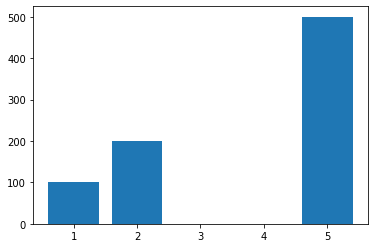

In [15]:
import matplotlib.pyplot as plt
plt.bar([1,2,5], [100,200,500])
plt.show()

Also in unserem Falle so:

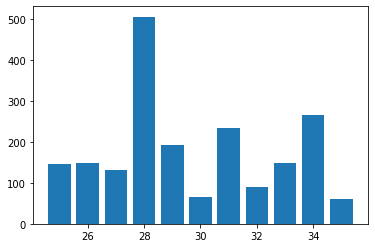

In [16]:
plt.bar( alters_daten.index, alters_daten.values )
plt.show()

Und ganz einfach wäre es so gegangen:

<AxesSubplot:>

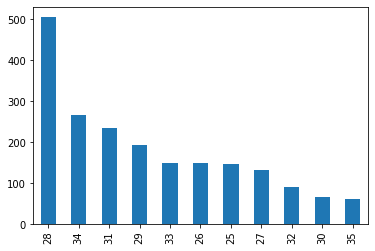

In [17]:
t["Age"].value_counts().plot.bar()

Und wenn wir die Alter aufsteigend sortiert haben wollen?

In [18]:
t["Age"].value_counts().sort_index()

25    146
26    148
27    131
28    506
29    192
30     65
31    234
32     91
33    148
34    266
35     60
Name: Age, dtype: int64

Insgesamt dann also so:

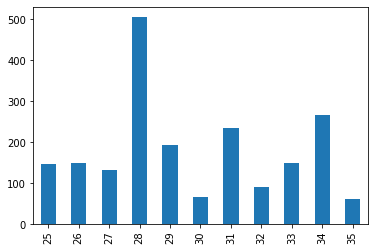

In [19]:
t["Age"].value_counts().sort_index().plot.bar()
plt.show()

## Quiz: Statistik

Versuche herauszufinden, wie man sich schnell mittels *Pandas* einen Überblick verschaffen kann über:

- das Durchschnittseinkommen
- die durchschnittliche Anzahl der Familienmitglieder
- den Prozentsatz der Kunden, die unter einer chronischen Krankheit leiden
- der Prozentsatz der Kunden, die eine Reiseversicherung abgeschlossen haben

Lösung:

In [20]:
t.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


Man sieht hier durch die Zeile *mean*, dass das Durchschnittseinkommen: 9.327 * 10^5 = 9.327 * 100000 = 932700 Rupien beträgt. Eine Rupie entspricht ca. 0.012 Euro, also ist das Durchschnittseinkommen ca.

In [21]:
932700*0.012 

11192.4

€. Die Familien bestehen durschnittlich 4.75 Personen und 27.7% der Kunden habe mindestens eine chronische Krankheit. 35.7% der Kunden haben sich für die angebotene Reiseversicherung entschieden.

Die `describe()` Methode eines *Pandas DataFrame* Objektes ist also sehr hilfreich, um schnell einen Überblick über die *numerischen Spalten* zu erhalten.

Wir nutzen das oben Gelernte bei der Untersuchung des Alters der Kunden, um nun auch die anderen nicht-numerischen Spalten zu untersuchen:

In [22]:
t.dtypes

Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

Das sind also die Spalten

- Employment Type
- GraduateOrNot
- FrequentFlyer
- EverTravelledAbroad

## Quiz: Nicht-numerische Spalten untersuchen

Ergänze den folgenden Python-Code, so dass wir einen Überblick über jede dieser vier nicht-numerischen Spalten erhalten:

In [23]:
t_kategorial = t.select_dtypes(include=['object'])

In [24]:
t_kategorial

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
0,Government Sector,Yes,No,No
1,Private Sector/Self Employed,Yes,No,No
2,Private Sector/Self Employed,Yes,No,No
3,Private Sector/Self Employed,Yes,No,No
4,Private Sector/Self Employed,Yes,Yes,No
...,...,...,...,...
1982,Private Sector/Self Employed,Yes,Yes,Yes
1983,Private Sector/Self Employed,Yes,No,Yes
1984,Private Sector/Self Employed,Yes,No,No
1985,Private Sector/Self Employed,Yes,Yes,Yes


In [25]:
for spalten_name in t_kategorial.columns:
    print(spalten_name)

Employment Type
GraduateOrNot
FrequentFlyer
EverTravelledAbroad


Lösung:




Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64


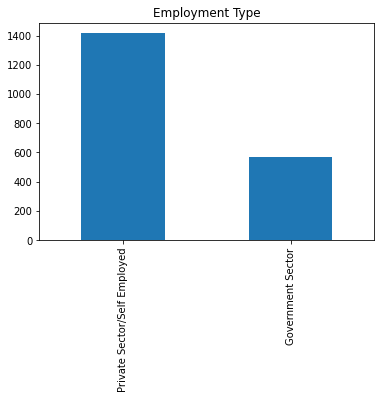




Yes    1692
No      295
Name: GraduateOrNot, dtype: int64


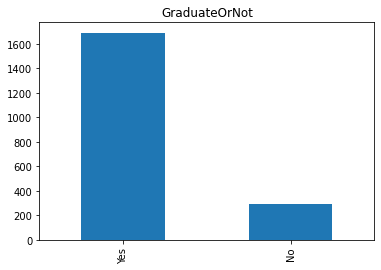




No     1570
Yes     417
Name: FrequentFlyer, dtype: int64


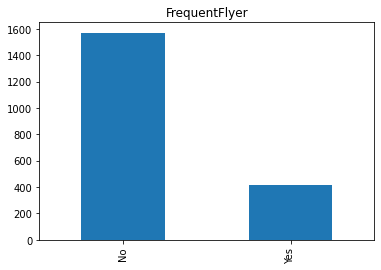




No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64


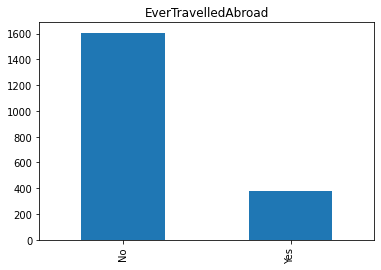

In [26]:
for spalten_name in t_kategorial.columns:    
    
    hauefigkeiten_per_wert = t[spalten_name].value_counts()    
    
    print( "\n\n")
    print( hauefigkeiten_per_wert )
        
    t[spalten_name].value_counts().plot.bar()
    plt.title( f"{spalten_name}" )
    plt.show()

# Unterteilung der Beispieldaten in Trainings- und Testdaten

Machine Learning Verfahren stellen interne Parameter durch viele sogenannte Trainingsdaten ein, um eine Aufgabe zu lösen. Nehmen wir hier im Folgenden alle 1987 Beispielkunden als Trainingsdaten, können wir aber nach dem Einstellen dieser internen Parameter (dem *Training des Modells*) nicht mehr testen, wie gut das Modell ist.

Daher unterteilt man die Beispieldaten typischerweise so:

- ca. 80-90% werden für das Training genommen
- ca. 20-10% werden für das Testen vorgehalten

Bevor wir die Beispieldaten jedoch in Trainings- und Testdaten zuschneiden sollten wir aufpassen, dass nicht im vorderen Teil für die Trainingsdaten beispielsweise nur junge Kunden sind und im hinteren Teil für die Testdaten ältere Kunden. Um eine eventuell vorhandene Systematik / Reihenfolge bei den Beispieldaten zu entfernen, können wir die *Pandas sample()* Methode nutzen.

Diese liefert uns von einem DataFrame einen zufälligen Teil zurück, zum Beispiel 1%:

In [27]:
t.sample(frac=0.01)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1370,28,Private Sector/Self Employed,Yes,800000,6,0,No,No,0
276,29,Private Sector/Self Employed,Yes,1050000,6,0,No,No,0
1129,26,Private Sector/Self Employed,Yes,1500000,2,0,Yes,Yes,1
144,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
1876,34,Private Sector/Self Employed,Yes,1500000,4,1,Yes,Yes,1
1773,28,Private Sector/Self Employed,Yes,500000,4,0,No,No,0
991,30,Private Sector/Self Employed,No,1450000,7,0,Yes,Yes,1
43,28,Private Sector/Self Employed,Yes,1200000,4,0,Yes,No,1
279,32,Government Sector,Yes,350000,6,0,No,No,0
346,25,Private Sector/Self Employed,Yes,1800000,7,1,Yes,No,1


1% von 1987 Beispielen sind?

In [28]:
len( t.sample(frac=0.01) )

20

Aufgerundet 20. Passt also!

Wir können uns jetzt auch 100% der Daten zurückgeben lassen, aber eben dann in einer zufälligen Reihenfolge:

In [29]:
t = t.sample(frac=1.0)

In [30]:
len(t)

1987

Und die Beispieldaten in der Tabelle `t` können wir nun beruhigt in Trainings- und Testdaten unterteilen.

Zuerst entscheiden wir wieviele Trainings- und wieviele Testdaten wir wollen:

In [31]:
N = len(t)
N_train = int(0.8*N)
N_test = N-N_train

In [32]:
N, N_train, N_test

(1987, 1589, 398)

Jetzt können wir die Beispieldaten zuschneiden (*slicen*):

In [33]:
t_train = t.iloc[0:N_train]
t_test  = t.iloc[N_train:]

In [34]:
t_train.shape

(1589, 9)

In [35]:
t_test.shape

(398, 9)

# Suchen nach ähnlichen Beispielen (ein Merkmal)

Stellen Sie sich vor: ein neuer Kunde kommt rein. Wir wollen vorhersagen, ob das ein Kunde ist, der eine Reiseversicherung abschliesst oder nicht (Zielvariable: *TravelInsurance*). Als einziges Merkmal nehmen wir erstmal das Einkommen (*AnnualIncome*) des Kunden. Wir suchen also in unserer Datenbank nach ähnlichen Kunden, d.h. Kunden, die ein sehr ähnliches Einkommen haben,.

## Quiz: Kunden nach einem Merkmal vergleichen

Schreibe Python-Code der für den ersten Kunden in den Testdaten das Einkommen abruft und mit dem Einkommen aller in den Trainingsdaten gespeicherten Kunden vergleicht!

So kommt man an den ersten Testkunden:

In [36]:
t_test.iloc[0]

Age                                              31
Employment Type        Private Sector/Self Employed
GraduateOrNot                                   Yes
AnnualIncome                                1400000
FamilyMembers                                     6
ChronicDiseases                                   0
FrequentFlyer                                    No
EverTravelledAbroad                             Yes
TravelInsurance                                   1
Name: 1612, dtype: object

Und so an sein Einkommen:

In [37]:
t_test.iloc[0]["AnnualIncome"]

1400000

Und so kann man über alle Kunden in den Trainingsdaten iterrieren:

In [38]:
for index, row in t_train.iterrows():
    print(row)
    
    # erstmal nur einen Kunden anzeigen,
    # auch wenn die Schleife hier über alle laufen würde!
    break

Age                                   28
Employment Type        Government Sector
GraduateOrNot                        Yes
AnnualIncome                     1200000
FamilyMembers                          4
ChronicDiseases                        0
FrequentFlyer                         No
EverTravelledAbroad                   No
TravelInsurance                        1
Name: 1884, dtype: object


Lösung:

In [39]:
einkommen_kunde_neu = t_test.iloc[0]["AnnualIncome"]

differenzen = []

for index, row in t_train.iterrows():
    einkommen_kunde_alt = row["AnnualIncome"]         
    differenz = abs(einkommen_kunde_neu - einkommen_kunde_alt)
    differenzen.append( differenz )

## Quiz: Gibt es ähnliche Kunden?

Nimm nun die Liste der Differenzen (der Einkommen) und versuche herauszufinden, ob es Kunden mit ähnlichen Einkommen gab!

Hinweis: Sortiere!

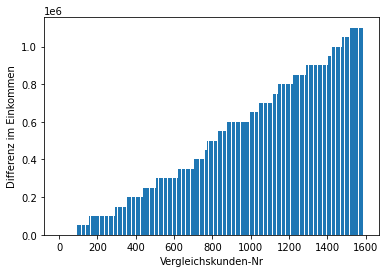

In [40]:
import numpy as np
plt.bar( np.arange(1,len(differenzen)+1), sorted(differenzen) )
plt.xlabel("Vergleichskunden-Nr")
plt.ylabel("Differenz im Einkommen")
plt.show()

Man sieht also, dass es sogar sehr viele Kunden gibt, die exakt das gleiche Einkommen (800000 Rupien) wie unser Testkunde haben.

## Quiz: Ähnliche Kunden rausfiltern

Nutze jetzt die Funktionalität von Pandas, um eine Tabelle aller Kunden zu erstellen, die ein Einkommen von 700.000-900.000 Rupien besitzen.

Berechne dann den Prozentsatz solcher Kunden, die eine Versicherung abgeschlossen haben.

Hinweis: so erhalten wir Kunden, die exakt das Gleiche einkommen besitzen:

In [41]:
t_train[ t_train["AnnualIncome"]-einkommen_kunde_neu == 0 ]

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
189,26,Private Sector/Self Employed,Yes,1400000,7,1,No,Yes,1
1896,31,Private Sector/Self Employed,Yes,1400000,3,0,No,Yes,1
103,26,Private Sector/Self Employed,Yes,1400000,5,0,No,Yes,1
631,33,Private Sector/Self Employed,Yes,1400000,6,1,No,Yes,1
987,33,Private Sector/Self Employed,Yes,1400000,2,1,No,Yes,1
...,...,...,...,...,...,...,...,...,...
776,25,Private Sector/Self Employed,Yes,1400000,6,0,Yes,Yes,1
282,26,Private Sector/Self Employed,Yes,1400000,4,0,No,Yes,1
201,31,Private Sector/Self Employed,Yes,1400000,2,0,No,Yes,1
1829,31,Private Sector/Self Employed,Yes,1400000,4,1,No,Yes,1


Es gibt also 125 Kunden in der Trainingsbeispielen, die exakt das gleiche Einkommen haben.

Lösung:

In [42]:
t_filter = t_train[ (t_train["AnnualIncome"]>einkommen_kunde_neu-100000) & (t_train["AnnualIncome"]<einkommen_kunde_neu+100000) ]
t_filter

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
638,26,Government Sector,Yes,1450000,3,0,Yes,Yes,1
189,26,Private Sector/Self Employed,Yes,1400000,7,1,No,Yes,1
1896,31,Private Sector/Self Employed,Yes,1400000,3,0,No,Yes,1
518,29,Private Sector/Self Employed,Yes,1350000,4,0,Yes,Yes,1
991,30,Private Sector/Self Employed,No,1450000,7,0,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...
1934,25,Private Sector/Self Employed,No,1350000,3,1,Yes,Yes,0
1047,31,Private Sector/Self Employed,Yes,1350000,4,0,No,Yes,1
201,31,Private Sector/Self Employed,Yes,1400000,2,0,No,Yes,1
1829,31,Private Sector/Self Employed,Yes,1400000,4,1,No,Yes,1


214 Kunden haben ein "ähnliches Gehalt" im Sinne von +/- 100.000 Rupien im Vergleich zum Einkommen des Testkundens von 800.000 Rupien.

Hiervon haben so viele eine Versicherung abgeschlossen:

In [43]:
t_filter["TravelInsurance"].mean()

0.9281045751633987

Man sieht: nur 23.8% der Kunden mit einem ähnlichen Testeinkommen haben eine Versicherung abgeschlossen. Das ist sogar unter den 

In [44]:
t["TravelInsurance"].mean()

0.3573225968797182

35.7% aller Kunden, die eine Versicherung abschließen.

# Suchen nach ähnlichen Beispielen (mehrere Merkmale)

Wir haben jetzt aber nicht nur ein Merkmal, das wir nutzen können, um ähnliche Kunden zu suchen. Bisher war unser Filter ja auch noch nicht sehr selektiv. Wir haben daher gleich 214 ähnliche Kunden gefunden.

Wir können die Suche ja noch weiter einschränken und nebem dem Einkommensmerkmal auch

- die Familiensituation
- und die Krankheitssituation

berücksichtigen.

## Quiz: Filtern nach mehreren Merkmalen

Schreibe eine Hilfsfunktion, die jeweils den Testkunden (kunde1) mit einem weiteren Kunden (kunde2) vergleicht und als Ergebnis die beiden Kunden entweder als ähnlich oder unähnlich ansieht.

Die Funktion sollte also grob folgende Struktur haben:

In [45]:
def vergleiche(kunde1, kunde2):
    
    # Funktion gibt True oder False zurück
    pass


def praediziere(kunde):

    zielvariablen_aehnlicher_kunden = []

    for index, kunde2 in t_train.iterrows():    
        aehnlich = vergleiche(kunde, kunde2)
        if aehnlich:
            zielvariablen_aehnlicher_kunden.append( kunde2["TravelInsurance"] )
            
    anz_aehnlicher_kunden = len(zielvariablen_aehnlicher_kunden)
    prozent_abschluss = np.mean( zielvariablen_aehnlicher_kunden ) * 100.0
    print( f"Anzahl ähnlicher Kunden: {anz_aehnlicher_kunden}. Prozentsatz Abschluss: {prozent_abschluss:.2f}", end=" " )
    if anz_aehnlicher_kunden == 0:
        print("--> keine Prädiktion möglich!")
    else:
        if prozent_abschluss > 50.0:
            print("--> Prädiktion: KAUF")
        else:
            print("--> Prädiktion: kein KAUF")

Lösung:

In [46]:
def vergleiche(kunde1, kunde2):
    
    kunde1_einkommen = kunde1["AnnualIncome"]
    kunde2_einkommen = kunde2["AnnualIncome"]
    
    kunde1_familie = kunde1["FamilyMembers"]
    kunde2_familie = kunde2["FamilyMembers"]
    
    kunde1_krankheit = kunde1["ChronicDiseases"]
    kunde2_krankheit = kunde2["ChronicDiseases"]
    
    if abs(kunde1_einkommen-kunde2_einkommen) == 0 and \
       abs(kunde1_familie-kunde2_familie) <= 0 and \
       kunde1_krankheit == kunde2_krankheit:
        return True
    else:
        return False

In [47]:
kunde = t_test.iloc[0]
praediziere( kunde )

Anzahl ähnlicher Kunden: 7. Prozentsatz Abschluss: 100.00 --> Prädiktion: KAUF


## Quiz: Anzahl ähnlicher Kunden pro Testkunde

Gebe für jeden der ersten 30 Testkunden aus wieviele Testkunden mit der Vergleichsfunktion gefunden werden konnten!

Lösung:

In [48]:
i = 0
for index, test_kunde in t_test.iterrows():
    praediziere( test_kunde )    
    i+=1
    if i==30:
        break

Anzahl ähnlicher Kunden: 7. Prozentsatz Abschluss: 100.00 --> Prädiktion: KAUF
Anzahl ähnlicher Kunden: 5. Prozentsatz Abschluss: 40.00 --> Prädiktion: kein KAUF
Anzahl ähnlicher Kunden: 2. Prozentsatz Abschluss: 50.00 --> Prädiktion: kein KAUF
Anzahl ähnlicher Kunden: 5. Prozentsatz Abschluss: 20.00 --> Prädiktion: kein KAUF
Anzahl ähnlicher Kunden: 16. Prozentsatz Abschluss: 100.00 --> Prädiktion: KAUF
Anzahl ähnlicher Kunden: 6. Prozentsatz Abschluss: 16.67 --> Prädiktion: kein KAUF
Anzahl ähnlicher Kunden: 2. Prozentsatz Abschluss: 0.00 --> Prädiktion: kein KAUF
Anzahl ähnlicher Kunden: 14. Prozentsatz Abschluss: 14.29 --> Prädiktion: kein KAUF
Anzahl ähnlicher Kunden: 0. Prozentsatz Abschluss: nan --> keine Prädiktion möglich!
Anzahl ähnlicher Kunden: 3. Prozentsatz Abschluss: 0.00 --> Prädiktion: kein KAUF
Anzahl ähnlicher Kunden: 5. Prozentsatz Abschluss: 0.00 --> Prädiktion: kein KAUF


/home/juebrauer/.local/share/virtualenvs/central-kQZYXD-3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/juebrauer/.local/share/virtualenvs/central-kQZYXD-3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Anzahl ähnlicher Kunden: 9. Prozentsatz Abschluss: 100.00 --> Prädiktion: KAUF
Anzahl ähnlicher Kunden: 5. Prozentsatz Abschluss: 20.00 --> Prädiktion: kein KAUF
Anzahl ähnlicher Kunden: 13. Prozentsatz Abschluss: 30.77 --> Prädiktion: kein KAUF
Anzahl ähnlicher Kunden: 0. Prozentsatz Abschluss: nan --> keine Prädiktion möglich!
Anzahl ähnlicher Kunden: 23. Prozentsatz Abschluss: 13.04 --> Prädiktion: kein KAUF
Anzahl ähnlicher Kunden: 9. Prozentsatz Abschluss: 11.11 --> Prädiktion: kein KAUF
Anzahl ähnlicher Kunden: 10. Prozentsatz Abschluss: 20.00 --> Prädiktion: kein KAUF
Anzahl ähnlicher Kunden: 0. Prozentsatz Abschluss: nan --> keine Prädiktion möglich!
Anzahl ähnlicher Kunden: 5. Prozentsatz Abschluss: 100.00 --> Prädiktion: KAUF
Anzahl ähnlicher Kunden: 9. Prozentsatz Abschluss: 22.22 --> Prädiktion: kein KAUF
Anzahl ähnlicher Kunden: 11. Prozentsatz Abschluss: 18.18 --> Prädiktion: kein KAUF
Anzahl ähnlicher Kunden: 20. Prozentsatz Abschluss: 85.00 --> Prädiktion: KAUF
Anzahl ä

Fällt dir was auf? Bei einigen Testkunden gibt es gar keine ähnlichen Kunden. Damit ist die Python-Liste `zielvariablen_aehnlicher_kunden` jedoch leer und der Versuch mittels der Funktion `np.mean(zielvariablen_aehnlicher_kunden)` den Mittelwert über eine leere Liste zu bilden führt sinnvollweise zu dem Rückgabewert `nan` (not a number).

Fazit:
Was man also bis jetzt vielleicht noch nicht berücksichtigt hat: bei einer Vergleichsfunktion, die nach ähnlichen Beispielen in einer Datenbank filtern soll, könnte das Ergebnis sein, dass es eventuell gar keine ähnlichen Beispiele gibt!

Wir haben also ein Problem: nicht immer gibt es ähnliche Beispiele!

# Suche nach den k ähnlichsten Beispielen

*k-NN* steht für *k-Nearest Neighbours* und löst das Problem, dass es nicht immer ähnliche Beispiele gibt, so: statt nach ähnlichen Beispielen zu suchen werden stets die k ähnlich*st*en Beispiele zurück gegeben. Egal wie ähnlich diese sind. Nochmal:

    Wir suchen bei k-NN also nicht unbedingt nach ähnlichen, sondern nach den ähnlich*st*en Beispielen.
    
In der Hoffnung, dass die ähnlichsten Beispiele, ähnlich genug sind, um sie für Aussagen zu neuen Datenpunkten verwenden zu können.

Die Vorgehensweise dieses Machine Learning Ansatzes ist daher verblüffend einfach:

- alle Beispiele werden in einer "Datenbank" abgespeichert (evtl. viele ähnliche zu einigen wenigen kondensiert). Das muss nicht unbedingt eine Datenbank sein, es kann auch einfach eine Datei sein.
- kommt ein neuer Inputvektor rein, versuchen wir aufgrund einiger ausgewählter oder aller Merkmale im Inputvektor die *k* ähnlichsten Beispiele zu finden
- die Werte für die Zielvariable(n) dieser k ähnlichsten Beispiele werden zu einer Vorhersage (Klasse oder Wert) zusammengefasst

Dieser Ansatz hat noch einen Vorteil: in der vorherigen benutzten booleschen Vergleichsfunktion `vergleiche()` mussten wir für jedes Merkmal genau Schwellen festlegen ab wann zwei Kunden noch als ähnlich an zu sehen sind. Suchen wir aber nur nach den ähnlichsten Kunden, müssen wir keine harten Schwellen festlegen.

Wir benötigen jetzt also eine Vergleichsfunktion, die uns nicht sagt, ob zwei Kunden ähnlich sind (Ergebnis: True oder False), sondern wie ähnlich diese sind. So eine Funktion muss die Ähnlichkeit quantifizieren können. Man spricht hier mathematisch gesehen auch von einer *Distanzfunktion*:

    d(Kunde1, Kunde2)
    
Damit können wir dann Abstände zwischen Kunden messen bzw. quantifizieren (d.h. mit einer Zahl beziffern) wie ähnlich zwei Kunden sind. So eine Distanzfunktion wiederum erlaubt es uns dann, den Abstand zwischen dem Testkunden und allen anderen Kunden in den Trainingsdaten auszurechnen:

    d(Testkunde, Trainkunde1)
    d(Testkunde, Trainkunde2)
    ...
    d(Testkunde, TrainkundeN)
    
Und dann können wir diese Abstände aufsteigend sortieren und nehmen in der sortierten Liste einfach die k ersten Einträge. Das sind die k ähnlichsten Kunden. Von diesen k ähnlichsten Kunden betrachten wir dann die Zielvariable (oder Zielvariabeln, falls wir mehrere Dinge vorhersagen wollen) und rechnen zum Beispiel einen Durchschnitt aus, um zu einer finalen Entscheidung zu gelangen.

In [49]:
t_train

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1884,28,Government Sector,Yes,1200000,4,0,No,No,1
638,26,Government Sector,Yes,1450000,3,0,Yes,Yes,1
1135,28,Private Sector/Self Employed,Yes,1100000,7,1,No,No,1
1820,28,Private Sector/Self Employed,Yes,800000,5,0,No,No,0
789,28,Private Sector/Self Employed,Yes,750000,4,0,No,No,1
...,...,...,...,...,...,...,...,...,...
586,28,Government Sector,Yes,300000,7,0,No,No,0
1482,33,Government Sector,Yes,700000,4,0,No,Yes,0
337,30,Private Sector/Self Employed,No,550000,7,0,Yes,No,0
748,28,Private Sector/Self Employed,Yes,650000,5,0,No,Yes,0


## Quiz: eine erste Distanzfunktion schreiben

Versuchen Sie eine Distanzfunktion `d(kunde1, kunde2)` zu schreiben, die misst wie unterschiedlich zwei Kunden hinsichtlich ihres Einkommens und ihrer Familiensituation sind!

Lösung:

Wir müssen berücksichtigen, dass die beiden Merkmale "Einkommen" und "Familiensituatiuon" in sehr unterschiedlichen Wertebereichen liegen:

In [50]:
t_train["AnnualIncome"].min(), t_train["AnnualIncome"].max()

(300000, 1800000)

In [51]:
t_train["FamilyMembers"].min(), t_train["FamilyMembers"].max()

(2, 9)

Wir sollten also die beiden Merkmale, die auf einer sehr unterschiedlichen Skala liegen am besten irgendwie normieren, z.B. indem wir ausrechnen, wieviel Prozent der konkrete Wert jeweils vom Maximum ist:

In [52]:
einkommen_original = t_test.iloc[0]["AnnualIncome"]
einkommen_original

1400000

In [53]:
einkommen_transformiert = einkommen_original / t_train["AnnualIncome"].max()
einkommen_transformiert

0.7777777777777778

In [54]:
anzfamitglieder_original = t_test.iloc[0]["FamilyMembers"]
anzfamitglieder_original

6

In [55]:
anzfamitglieder_transformiert = anzfamitglieder_original  / t_train["FamilyMembers"].max()
anzfamitglieder_transformiert

0.6666666666666666

Damit können wir dann leichter eine Distanzfunktion `d` schreiben, die Merkmale vergleicht, die aus sehr unterschiedlichen Bereichen kommen:

In [56]:
def d(kunde1, kunde2):
    
    kunde1_einkommen = kunde1["AnnualIncome"] / t_train["AnnualIncome"].max()
    kunde2_einkommen = kunde2["AnnualIncome"] / t_train["AnnualIncome"].max()
    diff_einkommen = abs(kunde1_einkommen - kunde2_einkommen)
    
    kunde1_familie = kunde1["FamilyMembers"] / t_train["FamilyMembers"].max()
    kunde2_familie = kunde2["FamilyMembers"] / t_train["FamilyMembers"].max()
    diff_familie = abs(kunde1_familie - kunde2_familie)
    
    print(diff_einkommen, diff_familie)    

In [57]:
testkunde = t_test.iloc[0]
testkunde

Age                                              31
Employment Type        Private Sector/Self Employed
GraduateOrNot                                   Yes
AnnualIncome                                1400000
FamilyMembers                                     6
ChronicDiseases                                   0
FrequentFlyer                                    No
EverTravelledAbroad                             Yes
TravelInsurance                                   1
Name: 1612, dtype: object

In [58]:
trainkunde1 = t_train.iloc[0]
trainkunde1

Age                                   28
Employment Type        Government Sector
GraduateOrNot                        Yes
AnnualIncome                     1200000
FamilyMembers                          4
ChronicDiseases                        0
FrequentFlyer                         No
EverTravelledAbroad                   No
TravelInsurance                        1
Name: 1884, dtype: object

In [59]:
trainkunde2 = t_train.iloc[1]
trainkunde2

Age                                   26
Employment Type        Government Sector
GraduateOrNot                        Yes
AnnualIncome                     1450000
FamilyMembers                          3
ChronicDiseases                        0
FrequentFlyer                        Yes
EverTravelledAbroad                  Yes
TravelInsurance                        1
Name: 638, dtype: object

In [60]:
d(testkunde, trainkunde1)

0.11111111111111116 0.2222222222222222


In [61]:
d(testkunde, trainkunde2)

0.02777777777777779 0.3333333333333333


Der Testkunde `testkunde` (Gehalt: 550.000 Rupien) ist also im Vergleich zum Trainingskunden-Beispiel `trainkunde1` (Gehalt: 300.000 Rupien) hinsichtlich seines Gehalts nicht so ähnlich (Gehaltsdifferenz: |550.000-300.000| Rupien=250.000 Rupien) wie zu `trainkunde2` (Gehalt: 700.000 Rupien und Gehaltsdifferenz: |550.000-700.000|=150.000 Rupien). Hinsichtlich der Familiensituation gibt es keinen Unterschied. Alle 3 Kunden leben in einer Familie mit 3 Mitgliedern.

Wir können jetzt unsere Distanzfunktion vervollständigen:

In [62]:
def d(kunde1, kunde2):
    
    kunde1_einkommen = kunde1["AnnualIncome"] / t_train["AnnualIncome"].max()
    kunde2_einkommen = kunde2["AnnualIncome"] / t_train["AnnualIncome"].max()
    diff_einkommen = abs(kunde1_einkommen - kunde2_einkommen)
    
    kunde1_familie = kunde1["FamilyMembers"] / t_train["FamilyMembers"].max()
    kunde2_familie = kunde2["FamilyMembers"] / t_train["FamilyMembers"].max()
    diff_familie = abs(kunde1_familie - kunde2_familie)
    
    # Bilde Durchschnitt über die beiden Abstände
    unterschied = 1/2 * (diff_einkommen + diff_familie)
    return unterschied

Hinweis: der Faktor 1/2 ist hier zur Durchschnittsbildung gedacht. Aber es ist später nur ein multiplikativer Faktor vor allen Distanzen und führt - egal wie der Faktor gewählt wird - bei der Suche nach den k ähnlichsten Beispielen stets zum gleichen Ergebnis.

Leicht-verdaulicher über ein Beispiel gesagt: ob die Abstände zum Testkunden später so aussehen:

    Abstand zu Trainkunde1: 0.2
    Abstand zu Trainkunde2: 0.3
    Abstand zu Trainkunde3: 0.1
    Abstand zu Trainkunde4: 0.5
    Abstand zu Trainkunde5: 0.7
    
oder so:

    Abstand zu Trainkunde1: 0.4
    Abstand zu Trainkunde2: 0.6
    Abstand zu Trainkunde3: 0.2
    Abstand zu Trainkunde4: 1.0
    Abstand zu Trainkunde5: 1.4
    
ist egal bei der Suche nach den ähnlichsten Beispielen. Hier würden in beiden Fällen bei k=3 die ersten drei Kunden als ähnlichste Kunden identifiziert.

In [63]:
d(testkunde, trainkunde1)

0.16666666666666669

In [64]:
d(testkunde, trainkunde2)

0.18055555555555555

Man sieht hier: der Abstand von `trainkunde2` und `testkunde` ist kleiner als der Abstand zwischen `trainkunde1` und `testkunde`.

Anders herum gesagt: die Ähnlichkeit von `trainkunde2` und `testkunde` ist größer als die Ähnlichkeit zwischen `trainkunde1` und `testkunde`.

## Alle Merkmale verwenden

Jetzt wollen wir die Vergleichsfunktion gleich in einem Rutsch besser bauen: wir wollen jetzt alle verfügbaren Merkmale verwenden:

In [65]:
t_train[:3]

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1884,28,Government Sector,Yes,1200000,4,0,No,No,1
638,26,Government Sector,Yes,1450000,3,0,Yes,Yes,1
1135,28,Private Sector/Self Employed,Yes,1100000,7,1,No,No,1


Da jedoch die Merkmale

In [66]:
t_kategorial = t.select_dtypes(include=['object'])
t_kategorial.columns

Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')

alles kategoriale Merkmale sind, verwandeln wir diese vorher noch in eine numerische Codierung mittels des "One-Hot-Encoding"-Ansatzes:

In [67]:
t_train = pandas.get_dummies(t_train)
t_train[:3]

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
1884,28,1200000,4,0,1,1,0,0,1,1,0,1,0
638,26,1450000,3,0,1,1,0,0,1,0,1,0,1
1135,28,1100000,7,1,1,0,1,0,1,1,0,1,0


Das Gleiche bereiten wir auch schon für die Testdaten vor:

In [68]:
t_test = pandas.get_dummies(t_test)
t_test[:3]

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
1612,31,1400000,6,0,1,0,1,0,1,1,0,0,1
1509,28,1300000,4,1,0,0,1,0,1,1,0,1,0
1024,32,800000,9,0,1,1,0,0,1,1,0,0,1


Damit können wir jetzt eine neue Distanzfunktion `d()` definieren, die es uns erlaubt die Distanz zwischen zwei Kunden in dem 8-dimensionalen Merkmalsraum

    (Alter, Einkommen, Familiensitutation, Krankheit, Anstellungsbereich, Akademiker, Vielflieger, Schon-im-Ausland-gewesen)
    
zu berechnen.

In [69]:
t_train.columns

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'TravelInsurance', 'Employment Type_Government Sector',
       'Employment Type_Private Sector/Self Employed', 'GraduateOrNot_No',
       'GraduateOrNot_Yes', 'FrequentFlyer_No', 'FrequentFlyer_Yes',
       'EverTravelledAbroad_No', 'EverTravelledAbroad_Yes'],
      dtype='object')

In [70]:
def d(kunde1, kunde2):
    
    kunde1_alter = kunde1["Age"] / t_train["Age"].max()
    kunde2_alter = kunde2["Age"] / t_train["Age"].max()
    diff_alter = abs(kunde1_alter - kunde2_alter)

    kunde1_einkommen = kunde1["AnnualIncome"] / t_train["AnnualIncome"].max()
    kunde2_einkommen = kunde2["AnnualIncome"] / t_train["AnnualIncome"].max()
    diff_einkommen = abs(kunde1_einkommen - kunde2_einkommen)
    
    kunde1_familie = kunde1["FamilyMembers"] / t_train["FamilyMembers"].max()
    kunde2_familie = kunde2["FamilyMembers"] / t_train["FamilyMembers"].max()
    diff_familie = abs(kunde1_familie - kunde2_familie)
    
    diff_krankheit = abs(kunde1["ChronicDiseases"] - kunde2["ChronicDiseases"])
    
    # die ehemals kategorialen Mermale sind nun numerische Merkmale mit
    # möglichen Werten {0,1} 
    diff_anstellung   = abs(kunde1["Employment Type_Government Sector"] - kunde2["Employment Type_Government Sector"])
    diff_akademiker   = abs(kunde1["GraduateOrNot_Yes"]                 - kunde2["GraduateOrNot_Yes"])
    diff_vielflieger  = abs(kunde1["FrequentFlyer_Yes"]                 - kunde2["FrequentFlyer_Yes"])
    diff_schonausland = abs(kunde1["EverTravelledAbroad_Yes"]           - kunde2["EverTravelledAbroad_Yes"])
       
    
    # Bilde Durchschnitt über die Abstände
    unterschied = 1/8 * (diff_alter +
                         diff_einkommen +
                         diff_familie +
                         diff_krankheit +
                         diff_anstellung +
                         diff_vielflieger +
                         diff_schonausland)
    
    return unterschied

Vergleichen wir doch jetzt einfach nochmal unseren ersten Testkunden mit den ersten beiden Trainingskunden:

In [71]:
testkunde   = t_test.iloc[0]
trainkunde1 = t_train.iloc[0]
trainkunde2 = t_train.iloc[1]
print( f"d(testkunde, trainkunde1)={d(testkunde, trainkunde1):.3f}" )
print( f"d(testkunde, trainkunde2)={d(testkunde, trainkunde2):.3f}" )

d(testkunde, trainkunde1)=0.302
d(testkunde, trainkunde2)=0.313


Auch hier ist `trainkunde2` immer noch ähnlicher zu `testkunde` als `trainkunde1` zu `testkunde`, aber man sieht, dass es kein so großer Unterschied mehr ist wie vorher.

## Quiz: Alle Distanzen berechnen

Berechne nun die Distanzen zwischen dem ersten Testkunden und allen Kunden in der Trainingsdatenbank!

Lösung:

In [72]:
i = 0
for index, trainkunde in t_train.iterrows():
    print( f"d(testkunde, trainkunde)={d(testkunde, trainkunde):.3f}" )
    i+=1
    
    # Hier geben wir nur die ersten 30 Distanzen aus!
    if i==30:
        break

d(testkunde, trainkunde)=0.302
d(testkunde, trainkunde)=0.313
d(testkunde, trainkunde)=0.295
d(testkunde, trainkunde)=0.191
d(testkunde, trainkunde)=0.209
d(testkunde, trainkunde)=0.198
d(testkunde, trainkunde)=0.157
d(testkunde, trainkunde)=0.365
d(testkunde, trainkunde)=0.316
d(testkunde, trainkunde)=0.195
d(testkunde, trainkunde)=0.420
d(testkunde, trainkunde)=0.351
d(testkunde, trainkunde)=0.205
d(testkunde, trainkunde)=0.313
d(testkunde, trainkunde)=0.184
d(testkunde, trainkunde)=0.316
d(testkunde, trainkunde)=0.215
d(testkunde, trainkunde)=0.157
d(testkunde, trainkunde)=0.097
d(testkunde, trainkunde)=0.309
d(testkunde, trainkunde)=0.198
d(testkunde, trainkunde)=0.351
d(testkunde, trainkunde)=0.365
d(testkunde, trainkunde)=0.192
d(testkunde, trainkunde)=0.247
d(testkunde, trainkunde)=0.330
d(testkunde, trainkunde)=0.042
d(testkunde, trainkunde)=0.181
d(testkunde, trainkunde)=0.306
d(testkunde, trainkunde)=0.444


## Quiz: Pandas Tabelle mit Vergleichsergebnissen erstellen

Erstelle nun eine Pandas-Tabelle mit den Ergebnissen in folgender Tabellenform:

Tabelle:

    Trainkunde ID | Distanz zu Testkunde | Hat Trainkunde Versicherung gekauft?
    ---------------------------------------------------------------------------
    128           | 0.123                 | 1
    935           | 0.456                 | 0
    74            | 0.091                 | 1

Lösung:

In [73]:
ids = []
distanzen = []
zielvariablen = []
for index, trainkunde in t_train.iterrows():
    
    ids.append( index )
    distanzen.append( d(testkunde, trainkunde) )
    zielvariablen.append( trainkunde["TravelInsurance"] )
    
dic = {"Trainkunde ID": ids,
       "Distanz zu Testkunde": distanzen,
       "Hat Trainkunde Versicherung gekauft?": zielvariablen}
V = pandas.DataFrame( dic )

In [74]:
V

,Trainkunde ID,Distanz zu Testkunde,Hat Trainkunde Versicherung gekauft?
0,1884,0.302381,1
1,638,0.312996,1
2,1135,0.295437,1
3,1820,0.191270,0
4,789,0.208631,1
...,...,...,...
1584,586,0.350992,0
1585,1482,0.208532,0
1586,337,0.326488,0
1587,748,0.076687,0


Klasse! Das ist jetzt doch schon Mal ein hilfreiches Zwischenergebnis. Wir müssten jetzt nur noch die Tabelle nach den Distanzen aufsteigend sortieren. Das führt uns zum nächsten Quiz!

## Quiz: Tabelle sortieren

Versuche im Inernet herauszufinden, wie man eine Pandas Tabelle aufsteigend nach einer bestimmten Spalte sortieren kann!

Lösung:

In [75]:
V.sort_values("Distanz zu Testkunde")

,Trainkunde ID,Distanz zu Testkunde,Hat Trainkunde Versicherung gekauft?
361,382,0.000000,1
566,1164,0.000000,1
1421,450,0.010417,0
609,416,0.013889,1
367,535,0.017361,1
...,...,...,...
1258,1652,0.545437,1
805,1467,0.555655,0
1539,1827,0.559127,1
441,1295,0.562897,1


## Quiz: Verteilung der Distanzwerte plotten

Bei der Gelegenheit: erzeuge dir ein Histogramm, das uns ein Gefühl dafür gibt, welche Distanzen wie oft vorkommen!

Lösung:

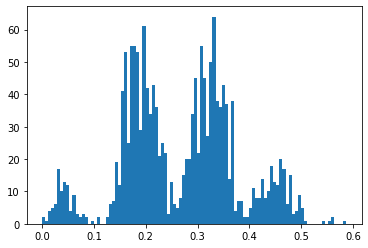

In [76]:
import matplotlib.pyplot as plt

plt.hist( V["Distanz zu Testkunde"], bins=100 )
plt.show()

## Quiz: Finale Entscheidung berechnen

Jetzt können wir aus der sortierten Liste die k (z.B. k=15) ähnlichsten Kunden zum Testkunden rausfischen und eine finale Entscheidung berechnen. Wie geht das?

Lösung:

In [77]:
V_sortiert_nach_Distanzen = V.sort_values("Distanz zu Testkunde")

k=15
V_sortiert_nach_Distanzen[:k]

,Trainkunde ID,Distanz zu Testkunde,Hat Trainkunde Versicherung gekauft?
361,382,0.000000,1
566,1164,0.000000,1
1421,450,0.010417,0
609,416,0.013889,1
367,535,0.017361,1
1147,865,0.017361,1
644,389,0.017361,1
469,121,0.017857,1
1405,907,0.017857,1
1144,323,0.021032,1


In [78]:
V_sortiert_nach_Distanzen["Hat Trainkunde Versicherung gekauft?"][:k]

361     1
566     1
1421    0
609     1
367     1
1147    1
644     1
469     1
1405    1
1144    1
682     1
778     0
920     1
354     1
945     1
Name: Hat Trainkunde Versicherung gekauft?, dtype: int64

In [79]:
V_sortiert_nach_Distanzen["Hat Trainkunde Versicherung gekauft?"][:k].mean()

0.8666666666666667

Fazit: nur mit einer Wahrscheinlichkeit von ca. 13% wird der erste Testkunde die Versicherung kaufen.

# Modellgüte berechnen

Die Testdaten werden beim Machine Learning stets vorgehalten, um später einschätzen zu können, wie gut ein Machine Learning Verfahren ist. Jetzt können wir für alle der Testkunden in diesen Testdaten einmal berechnen lassen, was unser k-NN Klassifikator vorhersagen würde und die Vorhersage mit der tatsächlichen Kaufentscheidung der Testkunden vergleichen.

Das Ergebnis ist eine sog. Korrekt-Klassifikationsrate (KKR): wieviel Prozent unserer Klassifikationsvorhersagen sind korrekt?

## Quiz: Eine Hilfsfunktion für die Prädiktion eines Kundens

Baue eine Hilfsfunktion `praediziere_einen_kunden()`, die für einen Kunden die Prädiktion vornimmt. Nutze dazu die entwickelten Codeteile von oben!

Lösung:

In [80]:
def praediziere_einen_kunden(testkunde):

    ids = []
    distanzen = []
    zielvariablen = []

    # berechne Distanzen zu allen Kunden
    for index, trainkunde in t_train.iterrows():

        ids.append( index )
        distanzen.append( d(testkunde, trainkunde) )
        zielvariablen.append( trainkunde["TravelInsurance"] )

    # erstelle Tabelle mit den Ergebnissen
    dic = {"Trainkunde ID": ids,
           "Distanz zu Testkunde": distanzen,
           "Hat Trainkunde Versicherung gekauft?": zielvariablen}
    V = pandas.DataFrame( dic )

    # suche nach den k nächsten Nachbarn
    V_sortiert_nach_Distanzen = V.sort_values("Distanz zu Testkunde")
    vorhersage = V_sortiert_nach_Distanzen["Hat Trainkunde Versicherung gekauft?"][:k].mean()
    
    # Vorhersage, d.h. Wahrscheinlichkeit für Kauf der Reiserversicherungen, zurückgeben
    return vorhersage

In [81]:
praediziere_einen_kunden(testkunde)

0.8666666666666667

## Quiz: Vorhersagen für alle Testkunden

Durchlaufe alle Testkunden. Für jeden Testkunden prädiziere seine Kaufentscheidung unter Zuhilfename der gerade erstellen Hilfsfunktion `praediziere_einen_kunden()`, die für einen einzelnen Testkunden die Prädiktion durchführt.

Wie gut ist das Modell im Durchschnitt bei der Vorhersage, ob ein Kunde die Reiseversicherung kaufen wird?

Lösung:

In [82]:
def praediziere_alle_kunden():

    N = len(t_test)
    print(N)
    print( f"Auswertung der Modellgüte auf insgesamt {N} Testkunden:" )

    test_kunde_nr = 0
    korrekt_vorhergesagt = 0
    for index_test, testkunde in t_test.iterrows():

        # Wenn weniger als 50% der k ähnlichsten Nachbarn
        # die Reiseversicherung gekauft haben,
        # dann sagen wir, dass auch dieser Testkunde die
        # Versicherung nicht kaufen wird (0)
        # ansonsten sagen wir vorher, dass er sie kaufen wird (1)
        vorhersage = 0 if praediziere_einen_kunden(testkunde) < 0.5 else 1

        # wie war tatsaechlich das Ergebnis?
        tatsaechlich = testkunde["TravelInsurance"]

        print( f"Testkunde #{test_kunde_nr}: {vorhersage:.2f} vs. {tatsaechlich}" )       

        if vorhersage == tatsaechlich:
            korrekt_vorhergesagt += 1

        test_kunde_nr +=1

    print("\nErgebnis zur Auswertung der Modellgüte:")
    KKR = (korrekt_vorhergesagt/N)*100
    print( f"Von {N} Testkunden konnten wir {korrekt_vorhergesagt} Mal" )
    print(  "die Verkaufsentscheidung korrekt vorhersagen." )
    print( f"Das entspricht einer Korrektklassifikationsrate (KKR) von {KKR} Prozent" )

In [83]:
#praediziere_alle_kunden()

## Quiz: weniger Merkmale

Verändere nochmal die Distanzfunktion `d()`, die zwei Kunden vergleicht. Nehme dabei nur zwei ausgewählte Merkmale statt alle. Wie verändert sich dann die KKR auf dem Testdatensatz?

Lösung:

Nehmen wir beispielsweise mal nur das Alter und die Information, ob der Kunde schon früher mal im Ausland war. Was ergibt sich dann für eine Korrekt-Klassifikationsrate (KKR)?

In [84]:
def d(kunde1, kunde2):
    
    kunde1_alter = kunde1["Age"] / t_train["Age"].max()
    kunde2_alter = kunde2["Age"] / t_train["Age"].max()
    diff_alter = abs(kunde1_alter - kunde2_alter)

    diff_schonausland = abs(kunde1["EverTravelledAbroad_Yes"] - kunde2["EverTravelledAbroad_Yes"])
       
    # Bilde Durchschnitt über die Abstände
    unterschied = 1/2 * (diff_alter + diff_schonausland)
    
    return unterschied

In [85]:
#praediziere_alle_kunden()

Fazit: Die Korrekt-Klassifikationsrate (KKR) ist um ein gutes Stück gesunken!

## Fazit zur Modellgüte

Ist unser Ergbnis bei Verwendung der Distanzfunktion `d()` mit allen Merkmalen gut?

Ein Vergleich mit diesem öffentlichen Notebook zu diesem Datensatz

https://www.kaggle.com/shailesh2692/gradient-boosting-prediction-83-42-accuracy

zeigt, dass auch moderne Verfahren wie "Extreme Gradient Boosting" nicht viel besser sind (KKR dort: 83.42%).

k-NN muss sich also nicht verstecken, auch wenn es ein überraschend einfaches Verfahren ist!

# Der finale Code im Überblick

Hier wollen wir nochmal den ganzen erarbeiteten Code in einer einzige Zelle zusammenfassen.

Das ist also eine eigene Implementierung eines k-NN Klassifikators.

Die Implementierung ist auch noch leicht verändert: statt das Maximum für die Merkmale Alter, Einkommen und Familienmitgliederanzahl immer wieder neu zu berechnen, wird dies jetzt nur einmal gemacht.

In [86]:
import pandas
import numpy as np

def daten_laden_und_aufbereiten():
    # 1. Beispieldaten einlesen
    t = pandas.read_csv("TravelInsurancePrediction.csv")
    
    # 2. Nicht benötigte Spalte entfernen
    t = t.drop( "Unnamed: 0", axis=1)
    
    # 3. Beispieldaten durchmischen
    t = t.sample(frac=1.0)
    
    # 4. Beispieldaten aufteilen in 80%
    #    Trainings- und 20% Testdaten
    N = len(t)
    N_train = int(0.8*N)
    N_test = N-N_train    
    t_train = t.iloc[0:N_train]
    t_test  = t.iloc[N_train:]
    
    # 5. Kategoriale Merkmale in Zahlen umwandeln
    t_train = pandas.get_dummies(t_train)
    t_test  = pandas.get_dummies(t_test)
    
    return t_test, t_train
    

def d(kunde1, kunde2):
    
    kunde1_alter = kunde1["Age"] / max_alter
    kunde2_alter = kunde2["Age"] / max_alter
    diff_alter = abs(kunde1_alter - kunde2_alter)

    kunde1_einkommen = kunde1["AnnualIncome"] / max_einkommen
    kunde2_einkommen = kunde2["AnnualIncome"] / max_einkommen
    diff_einkommen = abs(kunde1_einkommen - kunde2_einkommen)
    
    kunde1_familie = kunde1["FamilyMembers"] / max_familie
    kunde2_familie = kunde2["FamilyMembers"] / max_familie
    diff_familie = abs(kunde1_familie - kunde2_familie)
    
    diff_krankheit = abs(kunde1["ChronicDiseases"] - kunde2["ChronicDiseases"])
    
    # die ehemals kategorialen Mermale sind nun numerische Merkmale mit
    # möglichen Werten {0,1} 
    diff_anstellung   = abs(kunde1["Employment Type_Government Sector"] - kunde2["Employment Type_Government Sector"])
    diff_akademiker   = abs(kunde1["GraduateOrNot_Yes"]                 - kunde2["GraduateOrNot_Yes"])
    diff_vielflieger  = abs(kunde1["FrequentFlyer_Yes"]                 - kunde2["FrequentFlyer_Yes"])
    diff_schonausland = abs(kunde1["EverTravelledAbroad_Yes"]           - kunde2["EverTravelledAbroad_Yes"])
    
    # Bilde Durchschnitt über die Abstände
    unterschied = 1/8 * (diff_alter +
                         diff_einkommen +
                         diff_familie +
                         diff_krankheit +
                         diff_anstellung +
                         diff_vielflieger +
                         diff_schonausland)
    
    return unterschied


def praediziere_einen_kunden(testkunde, t_train, k=15):

    ids = []
    distanzen = []
    zielvariablen = []
    for index, trainkunde in t_train.iterrows():
        ids.append( index )
        distanzen.append( d(testkunde, trainkunde) )
        zielvariablen.append( trainkunde["TravelInsurance"] )

    dic = {"Trainkunde ID": ids,
           "Distanz zu Testkunde": distanzen,
           "Hat Trainkunde Versicherung gekauft?": zielvariablen}
    V = pandas.DataFrame( dic )
    V_sortiert_nach_Distanzen = V.sort_values("Distanz zu Testkunde")
    vorhersage = V_sortiert_nach_Distanzen["Hat Trainkunde Versicherung gekauft?"][:k].mean()
    return vorhersage


def praediziere_alle_kunden(t_test, t_train):

    N = len(t_test)
    print( f"Auswertung der Modellgüte auf insgesamt {N} Testkunden:" )
    test_kunde_nr = 0
    korrekt_vorhergesagt = 0
    for index_test, testkunde in t_test.iterrows():
        vorhersage = 0 if praediziere_einen_kunden(testkunde, t_train) < 0.5 else 1
        tatsaechlich = testkunde["TravelInsurance"]
        if vorhersage == tatsaechlich:
            korrekt_vorhergesagt += 1
            print("K", end=" ")
        else:
            print("F", end=" ")
        test_kunde_nr +=1

    KKR = (korrekt_vorhergesagt/N)*100
    print("\nErgebnis zur Auswertung der Modellgüte:")
    print( f"Von {N} Testkunden konnten wir {korrekt_vorhergesagt} Mal" )
    print(  "die Verkaufsentscheidung korrekt vorhersagen." )
    print( f"Das entspricht einer Korrektklassifikationsrate (KKR) von {KKR} Prozent" )

In [87]:
t_test, t_train = daten_laden_und_aufbereiten()
max_alter     = t_train["Age"].max()
max_einkommen = t_train["AnnualIncome"].max()
max_familie   = t_train["FamilyMembers"].max()
#praediziere_alle_kunden(t_test, t_train)

# KNN mit scikit-learn

Bisher haben wir den KNN-Klassifikator selber in Python geschrieben. Dieses Verfahren und auch noch viele andere sind aber auch in der Machine Learning Bibliothek *scikit-learn* enthalten.

Für einen Überblick über die zur Verfügung stehenden Machine Learning Verfahren zur Klassifikation und Regression, siehe:

https://scikit-learn.org

Dort kannst du auch Nearest Neighbor Verfahren finden. Jetzt haben wir aber das Verfahren doch schon selber implementiert! Wieso sollten wir aber doch lieber *scikit-learn* verwenden? Dafür gibt es mehrere Gründe.

## Wieso scikit-learn?

Ein Grund ist sicherlich die Zuverlässigkeit. Die Verfahren in *sckit-learn* werden von tausenden von *Machine Learning Engineers* auf der ganzen Welt verwendet und sind gut durchgetestet. Eine eigene Implementierung ist dagegen mit hoher Wahrscheinlichkeit noch fehlerbehaftet.

Der Hauptgrund ist die aber Effizienz. Die Verfahren dort speichern die Beispieldatenpunkte nicht einfach in einer langen Liste. So eine einfache Datenstruktur kommt der Aufgabe immer wieder nach ähnlichen Datenpunkten zu suchen nämlich nicht entgegegen. Daher war unsere Implementierung des k-NN Klassifikators auch sehr langsam. In der Informatik gibt es effiziente Datenstrukturen, die die Datenpunkte so speichern, dass man später sehr schnell den nächsten Nachbarn bzw. die k nächsten Nachbarn in der Menge der Beispieldatenpukte für einen neuen Datenpunkt finden kann.

Diese Verfahren heißen *k-d-Baum* (bzw. Englisch: *k-d-tree*) oder *Ball tree* und werden von scikit-learn automatisch verwendet.

## Daten fürs Machine Learning vorbereiten

Lass uns also mal sehen, was wir alles brauchen, um einen k-NN Klassifikator mit scikit-learn auf dem Reisendatensatz umzusetzen.

Erstmal

- laden wir die Beispieldaten wieder ein
- mischen diese durch, um eine mögliche Systematik zu entfernen
- wandeln kategorische Spalten in numerische Spalten um
- splitten die Beispieldaten in Trainings- und Testdaten auf

Das Durchmischen der Daten und Aufsplitten in Trainings- und Testdaten erfolgt nun aber mit Hilfe von scikit-learn. Außerdem müssen wir die Daten auch in Input- und Outputdaten aufbereiten. Dieses Struktur verlangen die meisten Machine Learning Algorithmen:

In [88]:
# 1. Beispieldaten einlesen
t = pandas.read_csv("TravelInsurancePrediction.csv")

# 2. Nicht benötigte Spalte entfernen
t = t.drop( "Unnamed: 0", axis=1)

# 3. Kategoriale Merkmale in Zahlen umwandeln
t = pandas.get_dummies(t)

In [89]:
t.head(3)

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
0,31,400000,6,1,0,1,0,0,1,1,0,1,0
1,31,1250000,7,0,0,0,1,0,1,1,0,1,0
2,34,500000,4,1,1,0,1,0,1,1,0,1,0


In [90]:
x = t.drop("TravelInsurance", axis=1)
y = t[ "TravelInsurance" ]

In [91]:
x.columns

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'Employment Type_Government Sector',
       'Employment Type_Private Sector/Self Employed', 'GraduateOrNot_No',
       'GraduateOrNot_Yes', 'FrequentFlyer_No', 'FrequentFlyer_Yes',
       'EverTravelledAbroad_No', 'EverTravelledAbroad_Yes'],
      dtype='object')

In [92]:
y

0       0
1       0
2       1
3       0
4       0
       ..
1982    1
1983    0
1984    0
1985    1
1986    0
Name: TravelInsurance, Length: 1987, dtype: int64

Jetzt spalten wir in Trainings- und Testdaten auf und durchmischen dabei auch noch zufällig.

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [94]:
x_train.shape

(1589, 12)

In [95]:
y_train.shape

(1589,)

In [96]:
x_train.head(2)

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
159,27,900000,7,1,1,0,0,1,1,0,1,0
799,31,1200000,3,0,1,0,0,1,1,0,1,0


In [97]:
y_train.head(2)

159    0
799    0
Name: TravelInsurance, dtype: int64

In [98]:
x_test.shape

(398, 12)

In [99]:
y_test.shape

(398,)

## Merkmale standardisieren

Standardmäßig verwendet der k-NN Klassifikator von scikit-learn ein Euklidisches Distanzmaß, um den Abstand zwischen zwei Datenpunkten zu berechnen:

https://de.wikipedia.org/wiki/Euklidischer_Abstand

Wie wir aber schon gelernt haben, macht es hierbei Probleme, wenn die Merkmale in sehr unterschiedlich großen Wertebereichen vorkommen, denn das macht den Vergleich der Merkmale schwierig. Daher führen wir am Anfang eine Normalisierung durch und zwar die z-Transformation:

https://de.wikipedia.org/wiki/Standardisierung_(Statistik)

Genau genommen handelt es sich eigentlich um eine sogenannte *Studentisierung*

https://de.wikipedia.org/wiki/Studentisierung

da wir das *arithmetische Mittel* und die *Stichprobenvarianz* (auch: *empirische Varianz*) verwenden und nicht den *Erwartungswert* bzw. die *Varianz* einer Zufallsvariable.

Klingt kompliziert? Eigentlich machen wir nichts anderes als nur den Mittwert µ von jedem Datenpunkt abzuziehen (wir *zentrieren* die Datenpunkte) und teilen dann durch eine Standardabweichung σ (Wurzel aus der Stichprobenvarianz), d.h. skalieren die Datenpunkte, damit die somit neu erhaltenen Datenpunkte einen Mittelwert von 0 und eine Standardabweichung von 1 haben:
       
           x - µ
    z =  ---------
             σ
             
Konkret geht das mit Hilfe des *StandardScaler* von scikit-learn:

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train.shape

(1589, 12)

In [101]:
x_train_scaled[0]

array([-0.90922885, -0.05365604,  1.38182856,  1.6083866 ,  1.55473609,
       -1.55473609, -0.41452251,  0.41452251,  0.4913311 , -0.4913311 ,
        0.48242985, -0.48242985])

Wir können jetzt mal nachschauen, ob wirklich die einzelnen Merkmale nach der Skalierungn einen Mittelwert von 0 haben. Nehmen wir mal die erste Spalte, d.h. das Alter:

In [102]:
x_train_scaled[:,0].mean()

-9.837596089818883e-17

Und wie ist die Standardabweichung dieser skalierten Alterswert?

In [103]:
x_train_scaled[:,0].std()

1.0

Passt also! Der Mittelwert ist quasi 0 und die Standardabweichung 1.

Für den späteren Test müssen wir aber auch die Testpunkte noch skalieren. Dazu nehmen wir die Mittelwerte und die Standardabweichungen der Merkmale der Trainingsdaten und nicht der Testdaten!

In [104]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled.shape

(398, 12)

In [105]:
x_test_scaled[0]

array([ 1.48276559,  1.54495864,  0.13919948,  1.6083866 , -0.64319598,
        0.64319598, -0.41452251,  0.41452251, -2.03528741,  2.03528741,
       -2.07284024,  2.07284024])

## k-NN Klassifikator mit scikit-learn

Jetzt können wir sehr einfach einen k-NN Klassifikator mit scikit-learn erzeugen:

In [106]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15, weights="uniform")

knn = knn.fit(x_train_scaled, y_train)

Bei `weights=uniform` werden alle k Nachbarn gleich stark gewichtet. Bei `weights=distance` werden die k Nachbarn so gewichtet, dass nähere Beispielpunkte auch ein größeres Gewicht erhalten, d.h. das Gewicht ist invers proportional zur Distanz zwischen Testpunkt und Beispielpunkt.

Prädizieren können wir nun mit der `predict()` Methode:

In [107]:
y_pred_test = knn.predict( x_test_scaled )
y_pred_test[:50]

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0])

## Modellgüte bestimmen

Jetzt können wir auch die Modellgüte bestimmen. Wie viele der Klassifikationen sind richtig?

In [108]:
y_test.values[:50]

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1])

In [109]:
errors = abs(y_test.values - y_pred_test)
errors[:50]

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1])

In [110]:
errors.mean()

0.20603015075376885

D.h. in nur 20% der Fälle war die Klassifikation falsch bzw. in

In [111]:
(1 - errors.mean())*100

79.39698492462311

Prozent der Fälle richtig.

Einfacher kann man die Genauigkeit eines Klassifikators bei Vorliegen von Prädiktionen und Ground-Truth-Daten auch so berechnen lassen:

In [112]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test.values, y_pred_test)

0.7939698492462312

## Alles in einer Codezelle

Mit Hilfe von scikit-learn können wir also sehr rasch einen Klassifikator erlernen und anwenden:

In [113]:
# 1. Beispieldaten einlesen
import pandas
t = pandas.read_csv("TravelInsurancePrediction.csv")

# 2. Nicht benötigte Spalte entfernen
t = t.drop( "Unnamed: 0", axis=1)

# 3. Kategoriale Merkmale in Zahlen umwandeln
t = pandas.get_dummies(t)

# 4. Aufspaltung in Inputdaten x und Outputdaten y
x = t.drop("TravelInsurance", axis=1)
y = t[ "TravelInsurance" ]

# 5. Aufspaltung in Trainings- und Testdaten
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# 6. Standardisierung der Daten
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 7. k-NN Klassifikator erlernen
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15, weights="uniform")
knn = knn.fit(x_train_scaled, y_train)

# 8. k-NN Klassifikator testen
from sklearn.metrics import accuracy_score
y_pred_test = knn.predict( x_test_scaled )
KKR = accuracy_score(y_test.values, y_pred_test)
print( f"KKR Klassifikator: {KKR}" )

KKR Klassifikator: 0.7939698492462312


Beachte, dass der resultierende Code viel kompakter ist und wieviel schneller die scikit-learn Implementierung gegenüber unserer eigenen Implementierung ist!

## Modell speichern

Zuerst speichern wir den Klassifikator und den Skalierer:

In [114]:
from joblib import dump
dump( (knn, scaler), "knn_und_skalierer.joblib")

['knn_und_skalierer.joblib']

## Modell wiederherstellen und anwenden

Wenn wir mit einem frischen Python-Interpreter starten, können wir folgendermaßen das trainierte scikit-Modell wieder verwenden. Zuerst laden wir das Modell und den Skalierer aus der Datei:

In [115]:
from joblib import load
knn, scaler = load("knn_und_skalierer.joblib")

In [116]:
type(knn)

sklearn.neighbors._classification.KNeighborsClassifier

In [117]:
type(scaler)

sklearn.preprocessing._data.StandardScaler

Jetzt bereiten wir einen einzelnen Anfragevektor vor:

In [118]:
import numpy as np
age = 31
annual_income = 400000
family_members = 6
chronic_diseases = 1
employment_gov = 1
employment_prv = 0
graduate_no = 0
graduate_yes = 1
frequent_flyer_no = 0 
frequent_flyer_yes = 1
abroad_no = 0
abroad_yes = 1
input_vec = np.array([age,
                      annual_income,
                      family_members,
                      chronic_diseases,
                      employment_gov,
                      employment_prv,
                      graduate_no,
                      graduate_yes,
                      frequent_flyer_no,
                      frequent_flyer_yes,
                      abroad_no,
                      abroad_yes])
input_vec

array([    31, 400000,      6,      1,      1,      0,      0,      1,
            0,      1,      0,      1])

Unsere Datenpunkte sind im kNN-Klassifikator standardisiert abgespeichert, daher müssen wir auch unseren Inputvektor erstmal standardisieren:

In [119]:
input_vec_scaled = scaler.transform( input_vec.reshape(-1,12) )
input_vec_scaled

/home/juebrauer/.local/share/virtualenvs/central-kQZYXD-3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.45762512, -1.38583494,  0.76051402,  1.6083866 ,  1.55473609,
        -1.55473609, -0.41452251,  0.41452251, -2.03528741,  2.03528741,
        -2.07284024,  2.07284024]])

Jetzt können wir den kNN-Klassifkator um eine Prädiktion für diesen Datenpunkt "bitten":

In [120]:
pred = knn.predict( input_vec_scaled )
pred

array([1])

In [121]:
if pred[0]==0:
    print("Kunde wird eher keine Reiseversicherung kaufen!")
else:
    print("Kunde wird eher eine Reiseversicherung kaufen!")

Kunde wird eher eine Reiseversicherung kaufen!


## Eigene Distanzfunktion mit scikit-learn verwenden

Damit wir mittels einer Standard-Distanzfunktion wie der Euklidischen Distanz die Merkmale miteinander vergleichen konnten, mussten wir die Merkmale standardisieren.

Ein alternativer Ansatz ist eine eigene definierte Distanzfunktion zu verwenden. Dies erlaubt es dann auch auf die Standardisierung zu verzichten, wenn man in der eigenen Distanzfunktion die unterschiedlichen Wertebereiche der Merkmale berücksichtigt.

Das wollen wir einmal exemplarisch durchlaufen. Hierzu fangen wir nochmal vorne an. Wir laden die Daten ein, führen dieses Mal aber keine Standardisierung durch:

In [122]:
# 1. Beispieldaten einlesen
t = pandas.read_csv("TravelInsurancePrediction.csv")

# 2. Nicht benötigte Spalte entfernen
t = t.drop( "Unnamed: 0", axis=1)

# 3. Kategoriale Merkmale in Zahlen umwandeln
t = pandas.get_dummies(t)

# 4. Aufspaltung in Trainings- und Testdaten
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Ein Blick auf die Daten zeigt, dass die Merkmale noch in ihren ursprünglichen Wertebereichen liegen:

In [123]:
x_train.head(2)

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
159,27,900000,7,1,1,0,0,1,1,0,1,0
799,31,1200000,3,0,1,0,0,1,1,0,1,0


Jetzt definieren wir eine eigene Distanzfunktion und erzeugen einen k-NN Klassifikator, den wir anweisen diese Distanzfunktion zu verwenden. Dazu wollen wir der Einfachheit halber nur die ersten beiden Merkmale

- Age
- AnnualIncome

verwenden. Vorab ermitteln wir auch noch die Maximalwerte für diese beiden Merkmale:

In [124]:
max_alter = x_train["Age"].max()
max_einkommen = x_train["AnnualIncome"].max()
print(max_alter, max_einkommen)

35 1800000


In [125]:
from sklearn.neighbors import KNeighborsClassifier

def meine_distanz_funktion(x,y):
    
    diff_alter     = abs(x[0]-y[0]) / max_alter
    diff_einkommen = abs(x[1]-y[1]) / max_einkommen
    
    return 0.5*diff_alter + 0.5*diff_einkommen

knn = KNeighborsClassifier(n_neighbors=15,
                           weights="uniform",
                           metric=meine_distanz_funktion)

Jetzt können wir wieder den k-NN Klassifikator mit den Trainingsdaten "trainieren". Aber dieses Mal brauchen wir eben keine skalierten Daten, sondern können auf den Rohdaten arbeiten, da wir auch eine sinnvolle Distanzfunktion auf den Rohdaten definiert haben.

In [126]:
knn = knn.fit(x_train, y_train)

Schauen wir mal wie gut der Klassifikator auf den Testdaten funktioniert:

In [127]:
from sklearn.metrics import accuracy_score
y_pred_test = knn.predict( x_test )
KKR = accuracy_score(y_test.values, y_pred_test)
print( f"KKR Klassifikator: {KKR}" )

KKR Klassifikator: 0.7738693467336684


## Quiz: Varianten der eigenen Distanzfunktion

Probiere jetzt 3 Varianten der Distanzfunktion aus und überprüfe jeweils, wie gut ist der Klassifkator, wenn

- nur das Alter
- nur das Einkommen
- sowohl das Alter als auch das Einkommen

jeweils in der Distanzfunktion verwendet werden!

Lösung:

In [128]:
def meine_distanz_funktion(x,y):
    diff_alter     = abs(x[0]-y[0]) / max_alter
    diff_einkommen = abs(x[1]-y[1]) / max_einkommen    
    return fak1*diff_alter + fak2*diff_einkommen


for fak1,fak2 in [ (1,0), (0,1), (0.5,0.5)]:
    knn = KNeighborsClassifier(n_neighbors=15,
                               weights="uniform",
                               metric=meine_distanz_funktion)
    knn = knn.fit(x_train, y_train)
    y_pred_test = knn.predict( x_test )
    KKR = accuracy_score(y_test.values, y_pred_test)
    print( f"KKR bei fak1,fak2=({fak1},{fak2}): {KKR}" )

KKR bei fak1,fak2=(1,0): 0.6507537688442211
KKR bei fak1,fak2=(0,1): 0.8015075376884422
KKR bei fak1,fak2=(0.5,0.5): 0.7738693467336684


Fazit: Es sieht also so aus, als ob das Einkommen ein viel besserer *Prädiktor* im Vergleich zum Alter ist, um zu bestimmen, ob jemand eine Reiseversicherung kauft.

# Verschiedene ML Verfahren auf ein Problem loslassen

Wie die folgende Liste

https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

auf der Projektwebseite von scikit-learn zeigt, gibt es sehr viele verschiedene Machine-Learning Ansätze. Aber welches sollte man wählen? Ist vielleicht sogar eines allen anderen überlegen?

## Das Mittagessen gibt's nicht gratis!

Zu der letzten Frage kann man sich Folgendes überlegen: wäre bei der Vielzahl von unterschiedlichen Klassifikations- und Regressionsproblemen ein Verfahren X deutlich anderen überlegen, würde scikit-learn wahrscheinlich nicht so viele verschiedene Machine-Learning Verfahren zur Auswahl anbieten, sondern eben nur das Verfahren X.

Die Hinweise deuten zudem stark darauf, dass es solch ein überlegenes Verfahren X nicht gibt. Dazu gibt es mathematische Untersuchungen, die sich in dem - in der Machine-Learning Community - bekanntem *No Free Lunch (NFL) Theorem* widerspiegeln:

Das Theorem besagt, dass alle Optimierungsalgorithmen gleich gut abschneiden, wenn ihre Leistung über alle möglichen Probleme gemittelt wird. Auch Machine Learning Algorithmen können als Optimierungsalgorithmen betrachtet werden, daher: es gibt nachweislich keinen einzigen besten Algorithmus für maschinelles Lernen.

Ein empfehlenswerter Artikel zu dem Theorem ist dieser Beitrag von Jason Brownlee:

https://machinelearningmastery.com/no-free-lunch-theorem-for-machine-learning/

Was heißt das konkret für die Praxis? Wenn du ein Problem hast: versuche einfach verschiedene ML-Verfahren aus scikit-learn aus!

## Daten vorbereiten

Da die Klassifikatoren im Wesentlichen alle gleich erzeugt, trainiert und angewendet werden, müssen wir die Trainings- und Testdaten für das Machine Learning nur einmal vorbereiten:

In [129]:
# 1. Beispieldaten einlesen
import pandas
t = pandas.read_csv("TravelInsurancePrediction.csv")

# 2. Nicht benötigte Spalte entfernen
t = t.drop( "Unnamed: 0", axis=1)

# 3. Kategoriale Merkmale in Zahlen umwandeln
t = pandas.get_dummies(t)

# 4. Aufspaltung in Inputdaten x und Outputdaten y
x = t.drop("TravelInsurance", axis=1)
y = t[ "TravelInsurance" ]

# 5. Aufspaltung in Trainings- und Testdaten
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# 6. Standardisierung der Daten
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [130]:
type(x_train_scaled)

numpy.ndarray

In [131]:
x_train_scaled.shape

(1589, 12)

In [132]:
type(y_train)

pandas.core.series.Series

In [133]:
y_train.shape

(1589,)

In [134]:
x_test_scaled.shape

(398, 12)

In [135]:
y_test.shape

(398,)

In [136]:
print( x_train_scaled[0], "---soll-abgebildet-werden-auf--->", y_train.iloc[0] )

[-0.90922885 -0.05365604  1.38182856  1.6083866   1.55473609 -1.55473609
 -0.41452251  0.41452251  0.4913311  -0.4913311   0.48242985 -0.48242985] ---soll-abgebildet-werden-auf---> 0


In [137]:
print( x_train_scaled[2], "---soll-abgebildet-werden-auf--->", y_train.iloc[2] )

[ 1.48276559  0.47921552 -1.1034296  -0.62174107  1.55473609 -1.55473609
 -0.41452251  0.41452251  0.4913311  -0.4913311   0.48242985 -0.48242985] ---soll-abgebildet-werden-auf---> 1


## Entscheidungsbäume

Als erstes wollen wir mal einen *Entscheidungsbaum* (Englisch: *Decision Tree*) als alternativen Ansatz zum k-NN Klassifikator ausprobieren.

Dazu erzeugen wir einen `DecisionTreeClassifier` und trainieren diesen mit den Trainingsdaten:

In [138]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

In [139]:
from sklearn.metrics import accuracy_score
y_pred_test = model.predict( x_test )
KKR = accuracy_score(y_test.values, y_pred_test)
print( f"KKR Entscheidungsbaum: {KKR}" )

KKR Entscheidungsbaum: 0.7713567839195979


Wir können den Entscheidungsbaum dann auch auf unterschiedliche Arten visualisieren.

### Entscheidungsbaum als Text darstellen

In [140]:
text_representation = tree.export_text(model)
print(text_representation[:5000])

|--- feature_1 <= 1325000.00
|   |--- feature_0 <= 32.50
|   |   |--- feature_1 <= 425000.00
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_7 >  0.50
|   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |--- feature_2 <= 5.50
|   |   |   |   |   |   |   |--- feature_2 <= 4.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 31.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_2 >  3.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 29.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  29.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  31.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |   |   |   

### Entscheidungsbaum grafisch darstellen

Oder grafisch folgendermaßen:

Dabei wollen wir in der Visualisierung zum besseren Verständnis die Merkmale in den Entscheidungsknoten mit ihren eigentlichen Bezeichnungen wie "Age" und "AnnualIncome" darstellen und nicht als "feature_0", "feature_1", etc.

Hierzu müssen wir eine Liste der Merkmalsnamen bereit halten. Aber das ist einfach, denn die Merkmalsnamen entsprechen ja den Spaltennamen:

In [141]:
x_train.columns

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'Employment Type_Government Sector',
       'Employment Type_Private Sector/Self Employed', 'GraduateOrNot_No',
       'GraduateOrNot_Yes', 'FrequentFlyer_No', 'FrequentFlyer_Yes',
       'EverTravelledAbroad_No', 'EverTravelledAbroad_Yes'],
      dtype='object')

Achtung! Die Visualisierung des Entscheidungsbaumes kann sehr lange dauern. Zudem entsteht durch folgenden Code eine sehr große Grafik, die am besten mit einem externen pdf-Viewer betrachtet wird.

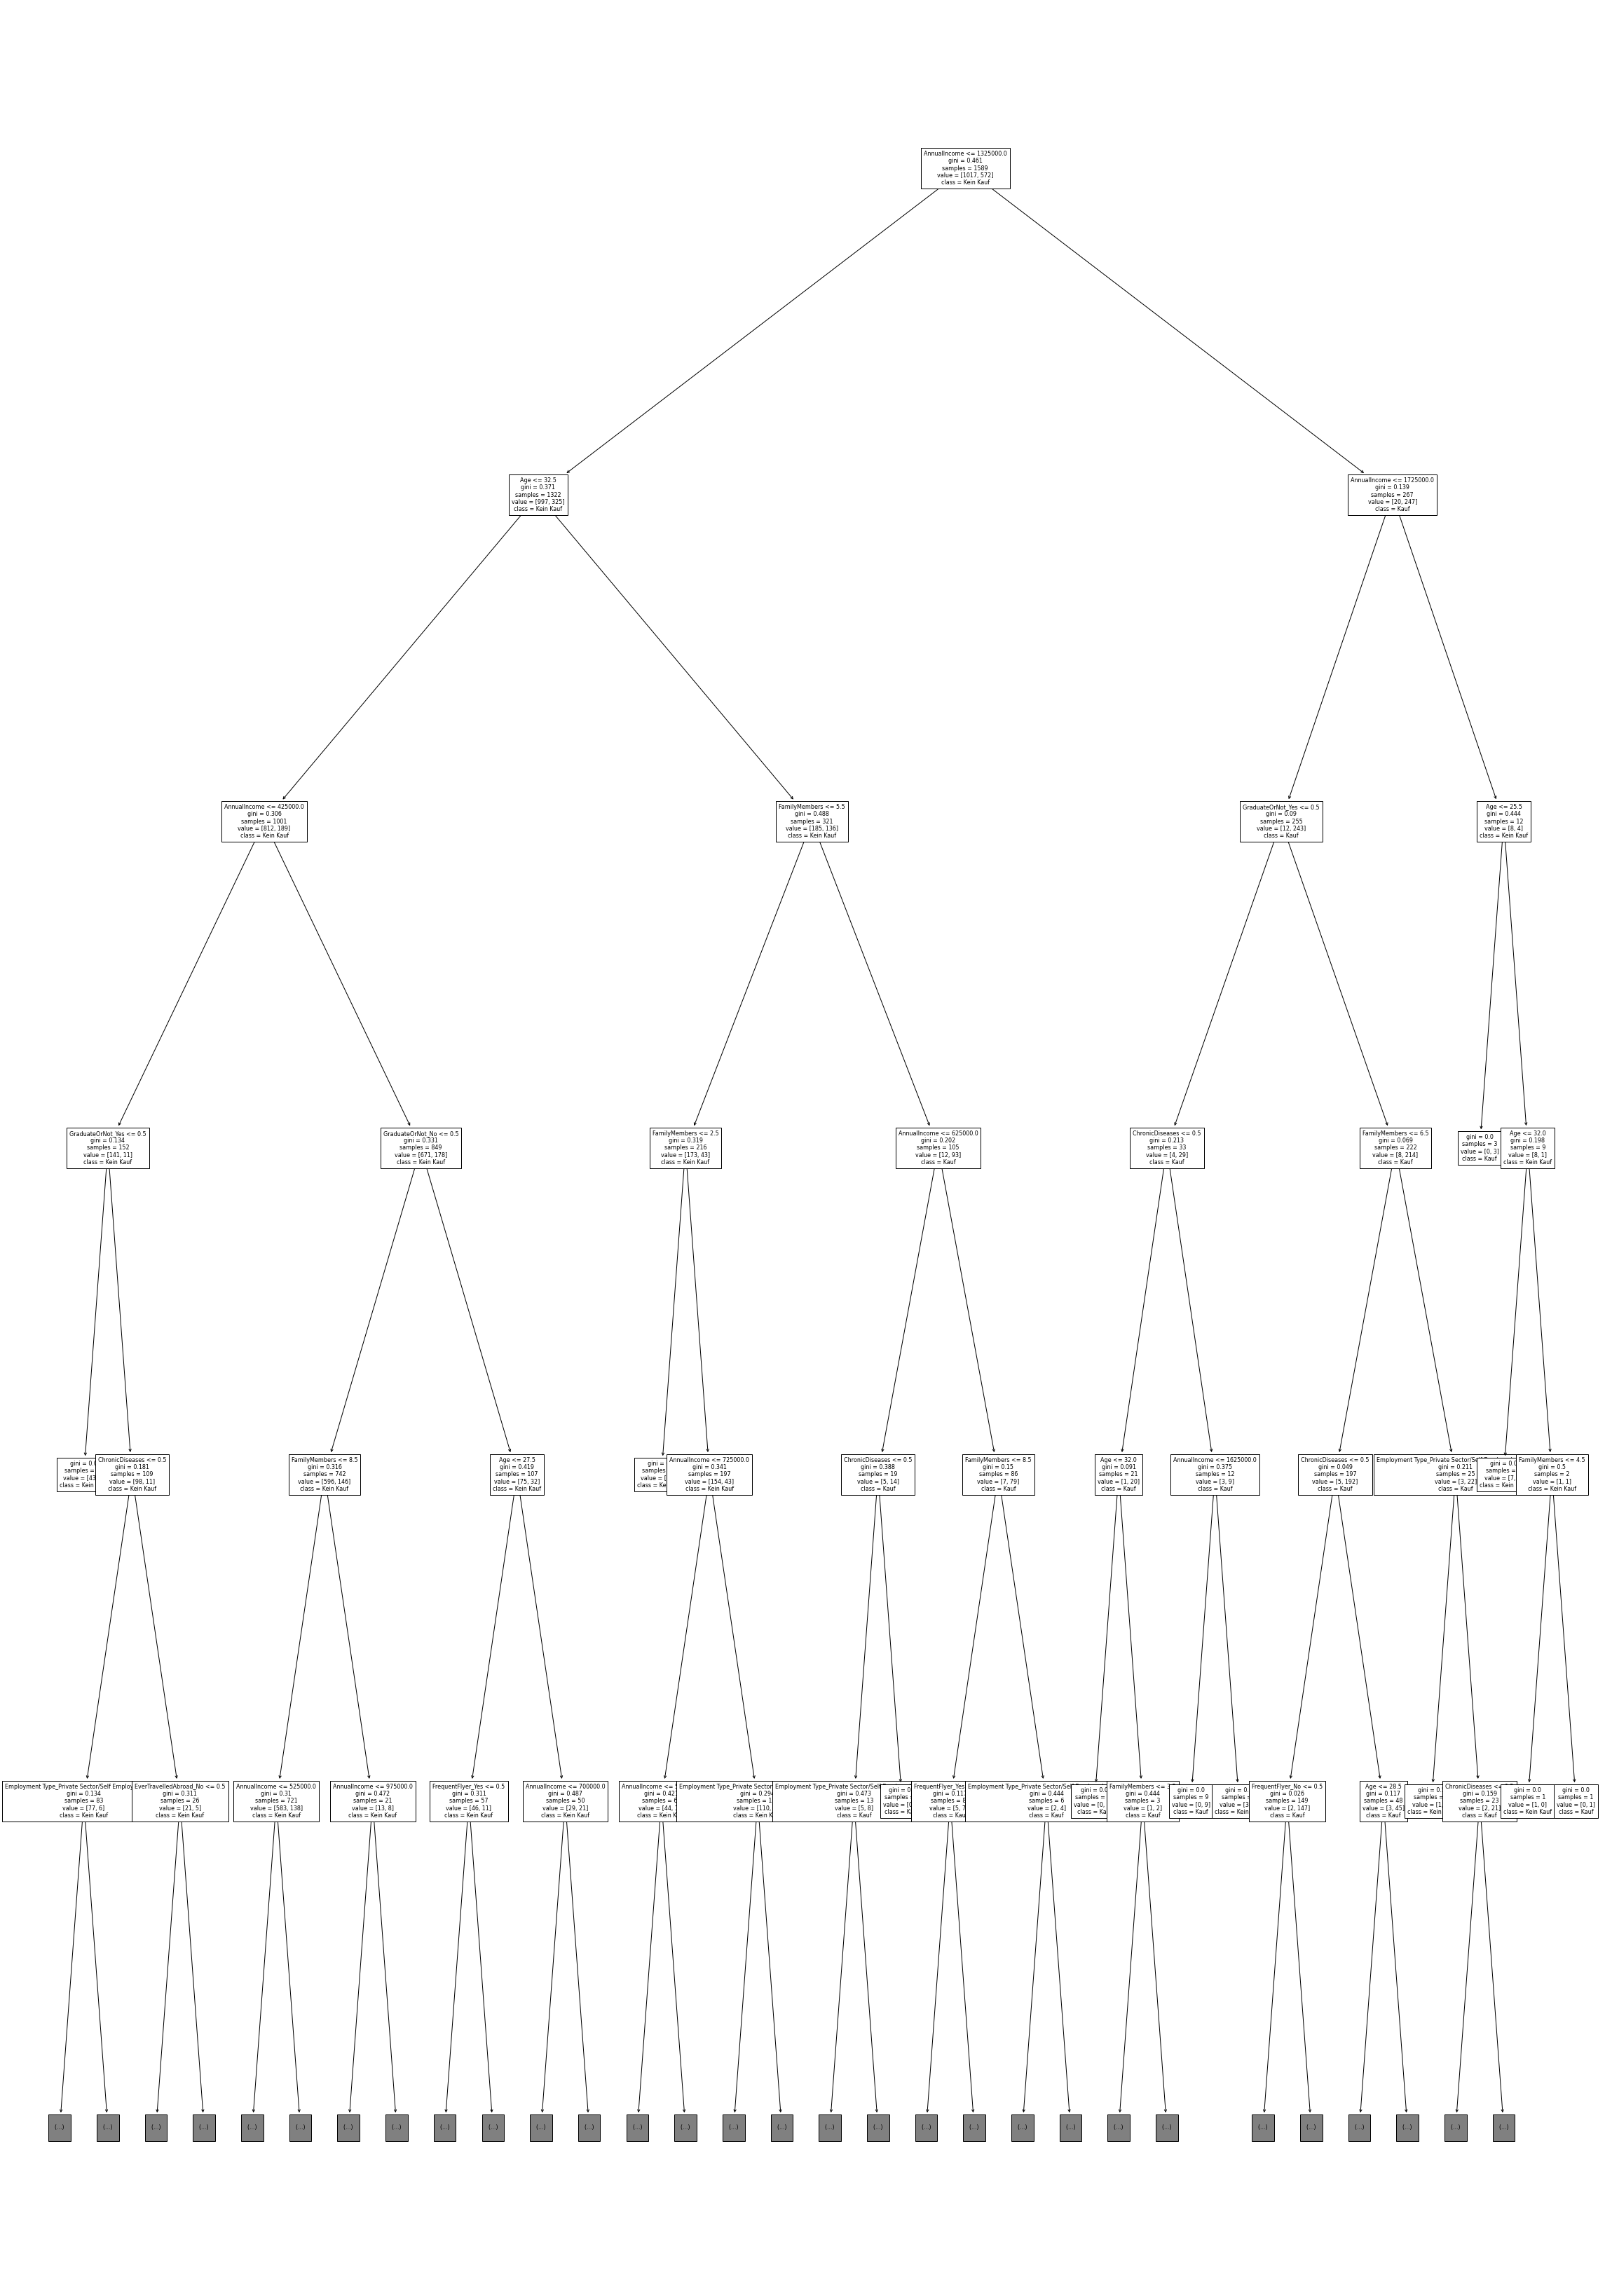

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40,60))
_ = tree.plot_tree(model,
                   fontsize=8,
                   feature_names=x_train.columns,
                   class_names=["Kein Kauf", "Kauf"],
                   max_depth=5)
plt.savefig("decision_tree.pdf")

Wir haben hier die Erstellung der Visualisierung nach 5 Knotenebenen abgebrochen, da der resultierende Entscheidungsbaum noch viel tiefer ist.

Hier noch eine Variante der Visualisierung mittel des Tools `graphviz`:

In [143]:
#!pip install graphviz
#!sudo apt install graphviz

import graphviz 
dot_data = tree.export_graphviz(model,
                                out_file=None, 
                                feature_names=x_train.columns,
                                class_names=["Kein Kauf", "Kauf"],                                
                                filled=True,
                                rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("Entscheidungsbaum")

'Entscheidungsbaum.pdf'

Die Erstellung läuft hier deutlich schneller und in der resultierenden pdf-Datei sieht man auch noch eine Farbkodierung der beiden Klassen.

### Quiz: Bedeutung der Zahlenangaben

Was bedeuten die Zahlen [1017, 572] im ersten Knoten?

Lösung:

In [144]:
sum(y_train==0)

1017

In [145]:
sum(y_train==1)

572

Es ist also die Anzahl der Beispiele für Klasse 0 (kein Kauf der Versicherung) und Klasse 1 (Kauf der Reiseversicherung).

### Quiz: Was bedeutet `gini`?

Das *Gini Impurity* oder die *Reinheit eines Knotens* ist ein informationstheoretisches Maß, das angibt, wie gut die beiden Klassen bis zu einem ausgewählten Knoten inzwischen getrennt sind.

Dieses Maß ist die Wahrscheinlichkeit, dass ein bestimmtes Merkmal bei einer Zufallsauswahl falsch klassifiziert wird. Wenn alle Elemente mit einer einzigen Klasse verknüpft sind, kann diese als rein bezeichnet werden.

## Entscheidungswälder

Man kann auch gleich einen ganzen Wald von Entscheidungsbäumen erlernen. Auch dieser Machine-Learning-Ansatz ist leicht über scikit-learn verfügbar:

In [146]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000)
model = model.fit(x_train, y_train)

Wir sind gespannt, ob ein Entscheidungswald das Klassifikationsproblem besser lösen kann als ein einzelner Entscheidungsbaum. So können wir es testen:

In [147]:
y_pred_test = model.predict( x_test )
KKR = accuracy_score(y_test.values, y_pred_test)
print( f"KKR EntscheidungsWALD: {KKR}" )

KKR EntscheidungsWALD: 0.7839195979899497


Ja, wir haben nochmal ca. 2-3% an Genauigkeit gewonnen.

## Support Vector Machines

Support Vector Machines (SVM) gehören ebenfalls zu den klassischen Machine-Learning Verfahren, die sehr beliebt sind, da sie oft sehr gute Ergebnisse erzielen.

Wie gut schneidet bei dem hier vorliegenden Klassifikationsproblem eine SVM ab?

In [148]:
from sklearn import svm
model = svm.SVC()
model = model.fit(x_train, y_train)

In [149]:
y_pred_test = model.predict( x_test )
KKR = accuracy_score(y_test.values, y_pred_test)
print( f"KKR SVM: {KKR}" )

KKR SVM: 0.7964824120603015


Hier haben wir also eine ähnliche KKR wie bei dem Entscheidungswald.

## Boosting Ansätze

scikit-learn beherbergt auch verschiedenste Ansätze, die auf dem Prinzip des *Boostings* beruhen. Dabei wird ein sogenannter *starker Klassifikator* durch Kombination von *schwachen Klassifikatoren* erlernt.

In [150]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8291457286432161

Für den folgenden *XGBoostClassifier* benötigen wir noch ein weiteres Python-Paket:

In [151]:
#!pip install xgboost

In [152]:
import xgboost as xgb
model=xgb.XGBClassifier(learning_rate=0.01, use_label_encoder=False)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.821608040201005

Tatsächlich erhalten wir hier mit den Boosting Ansätzen die besten Klassifikationsergebnisse auf den Testdaten. Die Boosting-Ansätze erfreuen sich nicht umsonst in den letzten Jahren einer ähnlichen Beliebtheit wie zum Beispiel die Neuronalen Netze.

# k-fache Kreuzvalidierung

Bis jetzt haben wir initial einen Trainings und einen Testdatensatz definiert und alle Auswertungen auf dem gleichen Testdatensatz gemacht. Es könnte aber sein, dass der Testdatensatz zufälligerweise besonders günstig für das eine oder andere ausgewählte Machine-Learning Verfahren war. Daher macht es Sinn mehrere Durchläufe durchzuführen, bei denen man unterschiedliche Teilmengen der Beispieldaten als Testdatensatz nimmt und den Rest jeweils als Trainingsdatensatz.

Genau das macht die *k-fache Kreuzvalidierung*. Im Englischen: *k-fold cross validation*.

Und natürlich ist auch die bereits in scikit-learn integriert:

## Beispieldaten k mal aufspalten

In [153]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[10,20,30], [40,50,60], [70,80,90], [100,110,120], [130,140,150]])
Y = np.array([60,150,240,330,420])
kf = KFold(n_splits=2, shuffle=False)

In [154]:
kf.get_n_splits(X)

2

In [155]:
for train_indices, test_indices in kf.split(X):
    print("\nNächste Aufteilung:")    
    print("TEST:", test_indices, "TRAIN:", train_indices)
    
    X_train, X_test = X[train_indices], X[test_indices]
    print("X_test:\n", X_test)
    print("X_train:\n", X_train)    
    Y_train, Y_test = Y[train_indices], Y[test_indices]


Nächste Aufteilung:
TEST: [0 1 2] TRAIN: [3 4]
X_test:
 [[10 20 30]
 [40 50 60]
 [70 80 90]]
X_train:
 [[100 110 120]
 [130 140 150]]

Nächste Aufteilung:
TEST: [3 4] TRAIN: [0 1 2]
X_test:
 [[100 110 120]
 [130 140 150]]
X_train:
 [[10 20 30]
 [40 50 60]
 [70 80 90]]


Und hier noch ein weiteres Beispiel:

In [156]:
X = np.arange(1,21)
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [157]:
kf = KFold(n_splits=4, shuffle=False)
for train_indices, test_indices in kf.split(X):    
    print("TEST:", test_indices, "TRAIN:", train_indices)

TEST: [0 1 2 3 4] TRAIN: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
TEST: [5 6 7 8 9] TRAIN: [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19]
TEST: [10 11 12 13 14] TRAIN: [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19]
TEST: [15 16 17 18 19] TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


## k-fache Kreuzvalidierung auf unserem Datensatz

Wir wollen nun die k-fache Kreuzvalidierung (k-fold Cross Validation) auf unserem Datensatz und einem konkreten Modell anwenden:

In [158]:
import pandas
t = pandas.read_csv("TravelInsurancePrediction.csv")

# 2. Nicht benötigte Spalte entfernen
t = t.drop( "Unnamed: 0", axis=1)

# 3. Kategoriale Merkmale in Zahlen umwandeln
t = pandas.get_dummies(t)

# 4. Aufspaltung in Inputdaten x und Outputdaten y
x = t.drop("TravelInsurance", axis=1).values
y = t[ "TravelInsurance" ].values

In [159]:
x[0]

array([    31, 400000,      6,      1,      1,      0,      0,      1,
            1,      0,      1,      0])

In [160]:
y[0]

0

In [161]:
x.shape, y.shape

((1987, 12), (1987,))

In [162]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=False)

for train_indices, test_indices in kf.split(x):    
    print()
    print("TEST:", test_indices[:5], "...", test_indices[-5:])
    print("TRAIN:", train_indices[:5], "...", train_indices[-5:])


TEST: [0 1 2 3 4] ... [393 394 395 396 397]
TRAIN: [398 399 400 401 402] ... [1982 1983 1984 1985 1986]

TEST: [398 399 400 401 402] ... [791 792 793 794 795]
TRAIN: [0 1 2 3 4] ... [1982 1983 1984 1985 1986]

TEST: [796 797 798 799 800] ... [1188 1189 1190 1191 1192]
TRAIN: [0 1 2 3 4] ... [1982 1983 1984 1985 1986]

TEST: [1193 1194 1195 1196 1197] ... [1585 1586 1587 1588 1589]
TRAIN: [0 1 2 3 4] ... [1982 1983 1984 1985 1986]

TEST: [1590 1591 1592 1593 1594] ... [1982 1983 1984 1985 1986]
TRAIN: [0 1 2 3 4] ... [1585 1586 1587 1588 1589]


In [163]:
KKRs = []

for train_indices, test_indices in kf.split(x):
    
    # 1. Aufspaltung in Trainings- und Testdaten
    #    nach dem aktuellen Split
    from sklearn.model_selection import train_test_split
    x_train = x[train_indices]
    y_train = y[train_indices]    
    x_test = x[test_indices]
    y_test = y[test_indices]
    
    # 2. Entscheidungsbaum lernen auf den Trainingsdaten
    from sklearn import tree
    model = tree.DecisionTreeClassifier()
    model = model.fit(x_train, y_train)
    
    # 3. Modellgüte des Entscheidungsbaum
    #    auf Basis der Testdaten ermitteln
    from sklearn.metrics import accuracy_score
    y_pred_test = model.predict( x_test )
    KKR = accuracy_score(y_test, y_pred_test)
    print( f"KKR Entscheidungsbaum: {KKR}" )
    
    # 4. KKR für diesen Split speichern
    KKRs.append( KKR )

KKR Entscheidungsbaum: 0.7839195979899497
KKR Entscheidungsbaum: 0.821608040201005
KKR Entscheidungsbaum: 0.7884130982367759
KKR Entscheidungsbaum: 0.760705289672544
KKR Entscheidungsbaum: 0.7556675062972292


Hier sieht man sehr gut, dass die Modellgüte stark von der jeweiligen Aufspaltung ("Split") in Trainings- und Testdaten abhängt.

Daher macht es Sinn diese Werte zu sammeln und zu mitteln, um zu einer besseren Aussage zu kommen, wie gut

- ein bestimmtes Machine-Learning Verfahren X
- auf einem bestimmten Datensatz Y

abschneidet.

In [164]:
KKRs

[0.7839195979899497,
 0.821608040201005,
 0.7884130982367759,
 0.760705289672544,
 0.7556675062972292]

In [165]:
np.mean(KKRs)

0.7820627064795007

## k-fache Kreuzvalidierungs als Funktionsaufruf

Statt in einer Schleife eine k-fache Kreuzvalidierung durchzuführen, kann man übrigens auch direkt die Funktion `sklearn.model_selection.cross_val_score()` verwenden:

In [166]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)
scores = cross_val_score(model, x, y, cv=5)

In [167]:
scores

array([0.78643216, 0.8241206 , 0.76322418, 0.77581864, 0.76322418])

In [168]:
np.mean(scores)

0.7825639532675974

# Testen verschiedener Verfahren

Jetzt haben wir nicht nur gesehen, wie man verschiedene Machine-Learning Verfahren, die in scikit-learn implementiert sind auf die Daten los lasen kann, sondern auch, wie man durch k-fache Kreuzvalidierung zu einer besseren Einschätzung der jeweiligen Modellgüte kommt.

Könnten wir den ganzen Vorgang der automatischen Modellsuche daher nicht automatisieren? Genau das machen wir jetzt!

In [169]:
import pandas
t = pandas.read_csv("TravelInsurancePrediction.csv")
t = t.drop( "Unnamed: 0", axis=1)
t = pandas.get_dummies(t)

x = t.drop("TravelInsurance", axis=1).values
y = t[ "TravelInsurance" ].values

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

verfahrens_liste = [ 
                     "DecisionTreeClassifier()",
                     "RandomForestClassifier(n_estimators=1000)",
                     "SVC()",
                     "GradientBoostingClassifier()",
                     "XGBClassifier(learning_rate=0.01, use_label_encoder=False)"
                   ]

for verfahren in verfahrens_liste:    
    model = eval(verfahren)
    model = model.fit(x_train, y_train)
    scores = cross_val_score(model, x, y, cv=5)
    print( "\n", verfahren )
    print( scores )
    print( f"---> KKR Durchschnitt: {np.mean(scores):.2f}" )


 DecisionTreeClassifier()
[0.7839196  0.82663317 0.77078086 0.77833753 0.76574307]
---> KKR Durchschnitt: 0.79

 RandomForestClassifier(n_estimators=1000)
[0.76884422 0.81155779 0.80100756 0.76574307 0.77329975]
---> KKR Durchschnitt: 0.78

 SVC()
[0.75628141 0.78894472 0.80100756 0.78085642 0.79093199]
---> KKR Durchschnitt: 0.78

 GradientBoostingClassifier()
[0.81909548 0.84924623 0.84130982 0.82871537 0.82115869]
---> KKR Durchschnitt: 0.83

 XGBClassifier(learning_rate=0.01, use_label_encoder=False)
[0.81407035 0.84170854 0.84634761 0.83123426 0.82871537]
---> KKR Durchschnitt: 0.83
